# Initial imports

In [1]:
#pip install plotly --upgrade

In [2]:
import pandas as pd   # lib pra trabalhar com o carregamento de arquivos .csv
import numpy as np    # lib pra processamento de matrizes
import seaborn as sns # lib pra visualização de gráficos
import matplotlib.pyplot as plt # lib pra visualização de gráficos também
import plotly.express as px # lib pra gerar gráficos dinâmicos

In [3]:
base_census = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\census.csv')
credit = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\credit_data.csv')

# **Escalonamento dos valores da base de dados de crédito**

In [4]:
count = 0
for col in credit.columns:
    print(count, col)
    count+=1

0 clientid
1 income
2 age
3 loan
4 default


In [5]:
credit.loc[(credit['loan'] >= 10000)]

clientid        income        age          loan  default
29          30  58842.891308  54.510948  10871.186790        0
103        104  57296.160823  25.708482  10601.082783        1
104        105  60844.092495  45.655205  12072.255758        0
150        151  69579.929211  57.756243  10868.241472        0
152        153  65635.661529  51.167714  12701.603475        0
...        ...           ...        ...           ...      ...
1807      1808  57359.552435  34.795263  10011.410682        1
1822      1823  61129.723156  35.109178  11302.767687        0
1890      1891  57303.479761  52.155366  10491.632151        0
1914      1915  68110.239953  32.171575  11029.667710        1
1972      1973  52389.366848  54.969313  10398.820592        0

[121 rows x 5 columns]

In [6]:
credit.loc[credit['age'] < 0, 'age'] = 40.92

In [7]:
credit['age'].fillna(credit['age'].mean(), inplace = True)

In [8]:
x_credit = credit.iloc[:, 1:4].values
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [9]:
y_credit = credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [10]:
credit.loc[(credit['clientid'] == 29) | (credit['clientid'] == 31) | (credit['clientid'] == 32)]

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [11]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)
x_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [12]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [13]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

# **Tabela de dados do censo**

In [14]:
# De acordo com a tabela temos: 
# age            -> Variável Numéricamente Discreta
# workclass      -> Variável Categóricamente Ordinal
# final-weight   -> Variável Numéricamente Contínua (Pontuação de cada pessoa)
# education      -> Variável C. Ordinal (Pode ser considerada uma var Nominal simples, se não for tão importante pro seu objetivo)
# education-num  -> Variável N. Discreta
# marital-status -> Variável C. Nominal
# occupation     -> Variável C. Nominal
# relationship   -> Variável C. Nominal
# race           -> Variável C. Nominal
# sex            -> Variável C. Nominal
# capital-gain   -> Variável N. Contínua
# capital-loos   -> Variável N. Contínua
# hour-per-week  -> Variável N. Discreta
# native-country -> Variável C. Nominal
# income         -> Variável C. Ordinal

In [15]:
count = 0
for col in base_census.columns:
    print(count, col)
    count+=1

0 age
1 workclass
2 final-weight
3 education
4 education-num
5 marital-status
6 occupation
7 relationship
8 race
9 sex
10 capital-gain
11 capital-loos
12 hour-per-week
13 native-country
14 income


In [16]:
base_census.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [17]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [18]:
base_census.isnull().sum() # Os dados estão consistentes

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [19]:
np.unique(base_census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<AxesSubplot: xlabel='income', ylabel='count'>

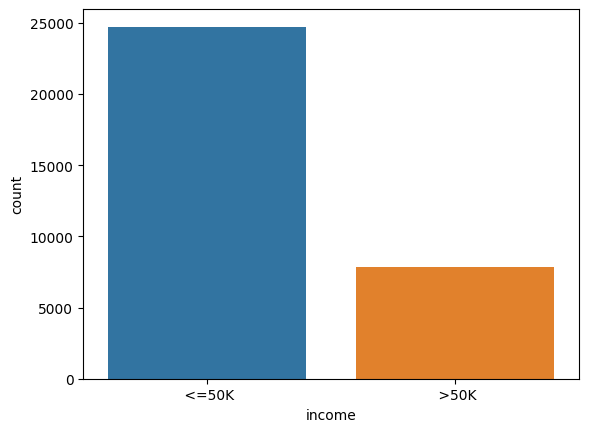

In [20]:
sns.countplot(x = base_census['income']) # Quantidade desbalanceada entre os dois valores

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

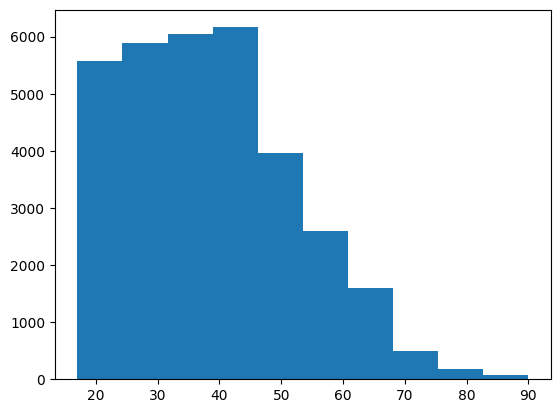

In [21]:
plt.hist(x = base_census['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

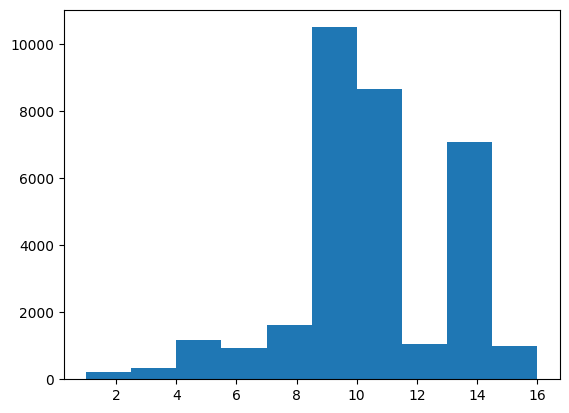

In [22]:
plt.hist(x = base_census['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

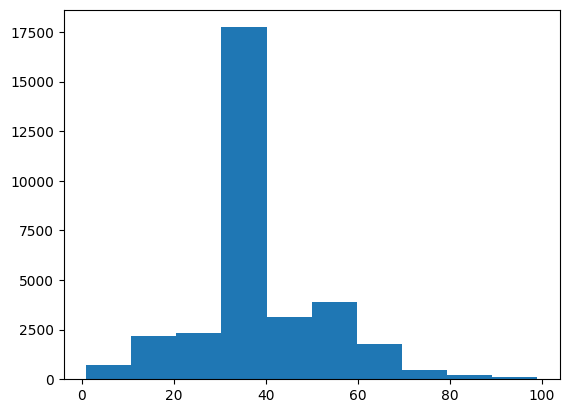

In [23]:
plt.hist(x = base_census['hour-per-week'])

In [24]:
grafico = px.treemap(base_census, path=['workclass', 'age']) # É possível agrupar dados
grafico.show() # Os agrupamentos de uma coluna

In [25]:
grafico = px.treemap(base_census, path=['occupation', 'relationship', 'age']) # É possível agrupar dados
grafico.show() # Os agrupamentos de uma coluna

In [26]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [27]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship', 'income'])
grafico.show()

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [28]:
x_census = base_census.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [29]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# **LabelEncoder** Transformação de dados categóricos em numéricos 

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder_teste = LabelEncoder()

In [31]:
label_encoder_teste

LabelEncoder()

In [32]:
teste = label_encoder_teste.fit_transform(x_census[:, 1])
teste

array([7, 6, 4, ..., 4, 4, 5])

In [33]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [34]:
x_census[:, 1] = label_encoder_workclass.fit_transform(x_census[:, 1])
x_census[:, 3] = label_encoder_education.fit_transform(x_census[:, 3])
x_census[:, 5] = label_encoder_marital.fit_transform(x_census[:, 5])
x_census[:, 6] = label_encoder_occupation.fit_transform(x_census[:, 6])
x_census[:, 7] = label_encoder_relationship.fit_transform(x_census[:, 7])
x_census[:, 8] = label_encoder_race.fit_transform(x_census[:, 8])
x_census[:, 9] = label_encoder_sex.fit_transform(x_census[:, 9])
x_census[:, 13] = label_encoder_country.fit_transform(x_census[:, 13])

In [35]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

# **OneHotEncoder** Desconsiderar que um atributo seja mais importante que o outro

In [36]:
len(np.unique(base_census['workclass']))

9

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
# Formato de lista no transformers
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [39]:
x_census = onehotencoder_census.fit_transform(x_census).toarray() #Fazer a conversão do numpy array

In [40]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [41]:
x_census.shape

(32561, 108)

In [42]:
# Agora é necessário fazer o escalonamento dos valores
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [43]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# **Divisão das bases em treinamento e teste**

Base de dados credit

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)
# o random_state é muito importante para quando executar, ter a mesma divisão dos registros na base de treinamentos e teste
# e conseguir comparar os resultados

In [46]:
# valor de teste pois definimos 0.25 de size
# 3 colunas retornadas que são: income, age, loan
x_credit_treinamento.shape

(1500, 3)

In [47]:
# 1 coluna que é a classe que paga e não paga
y_credit_treinamento.shape

(1500,)

In [48]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

Base de dados Census

In [49]:
# 15% de teste por causa da base que é muito maior
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [50]:
# 27676 registros e 108 colunas
# 27676 registros e 1 coluna que é a >50K ou <=50K
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [51]:
# 15% dos dados que serão usados para testar o algoritmo
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

# **Salvar as variáveis**

In [52]:
import pickle

In [53]:
with open('credit.pkl', mode = 'wb') as f: # Arquivo que vamos salvar e wb = write, f = variável utilizada para salvar em disco
  pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f) # variáveis no formato de lista

In [54]:
# fazer a mesma coisa para a base do census
with open('census.pkl', mode = 'wb') as f: # Arquivo que vamos salvar e wb = write, f = variável utilizada para salvar em disco
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f) # variáveis no formato de lista

# Algortimo: **Naïve Bayes**

In [55]:
from sklearn.naive_bayes import GaussianNB # Distribuição estatítica normal

Base risco de crédito

In [56]:
risco_credito = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\risco_credito.csv')

In [57]:
risco_credito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [58]:
x_risco_credito = risco_credito.iloc[:, 0:4].values # formatar para numpy array

In [59]:
y_risco_credito = risco_credito.iloc[:, 4].values

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [61]:
x_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_encoder_garantias.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_risco_credito[:, 3])

In [62]:
x_risco_credito # Nessa base de dados não é necessario o OneHotEncoder

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [63]:
import pickle 
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f)

In [64]:
naive_risco_credito = GaussianNB()
# Primeiro parâmetro atributos previsores, Segundo parametro são as classes ou respostas esperadas
naive_risco_credito.fit(x_risco_credito, y_risco_credito) # tabela de probabilidades para treinar precisa ser encaixada (fit)

GaussianNB()

In [65]:
# Dados para previsão:
# história boa  (0), dívida alta (0), garantias nenhuma  (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

# A função predict recebe um parâmetro X que é os dados ou os atributos do cliente
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]]) 

In [66]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [67]:
naive_risco_credito.classes_ # Verificar as classes que podem ser retornadas

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [68]:
naive_risco_credito.class_count_ # Verificar os registros de cada classe

array([6., 5., 3.])

In [69]:
naive_risco_credito.class_prior_ # Probabilidades aprior (%) de cada classe

array([0.42857143, 0.35714286, 0.21428571])

Base credit data

In [70]:
import pickle
with open('credit.pkl', 'rb') as f: # read
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [71]:
# 1500 registros c/ idade, renda e divida
# 1500 registros c/ paga ou nao paga o emprestimo
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [72]:
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [73]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [74]:
previsoes = naive_credit_data.predict(x_credit_teste)

In [75]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
# Comparar as previsoes com as respostas reais

In [77]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
accuracy_score(y_credit_teste, previsoes) # 93% de acertos

0.938

In [80]:
confusion_matrix(y_credit_teste, previsoes) # Mostra uma matriz com acertos classe por classe
# Linha 0 os clientes que pagam os empréstimos     | Coluna 0: Clientes que pagam e foram classificados corretamente Coluna 1: Clientes que pagam porém foram classificados como a coluna número 1 (Erros)
# Linha 1 os clientes que não pagam os empréstimos | Coluna 0: Clientes que não pagam e foram classificados que pagam Coluna 1: Cliente que foram classificados corretamente

array([[428,   8],
       [ 23,  41]], dtype=int64)

In [81]:
from yellowbrick.classifier import ConfusionMatrix # Maneira simplificada de entender as previsoes erradas

0.938

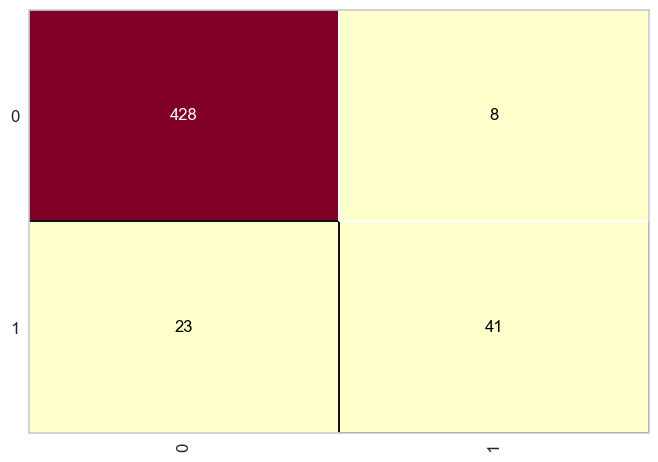

In [82]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit_treinamento, y_credit_treinamento) # Fazer o mesmo treinamento com essa biblioteca
cm.score(x_credit_teste, y_credit_teste)

In [83]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



Base census

In [84]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [85]:
# 27676 registros, 108 atributos (grande por causa do onehotencoder)
# 27676 registros, 1 atributo (> 50k ou <=50k)

x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [86]:
# 4885 pessoas, 108 atributos (grande por causa do onehotencoder)
# 4885 pessoas, 1 atributo (> 50k ou <=50k)
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [87]:
naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)

previsoes = naive_census.predict(x_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [88]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [89]:
accuracy_score(y_census_teste, previsoes) # não executar o escalonamento

0.4767656090071648

0.4767656090071648

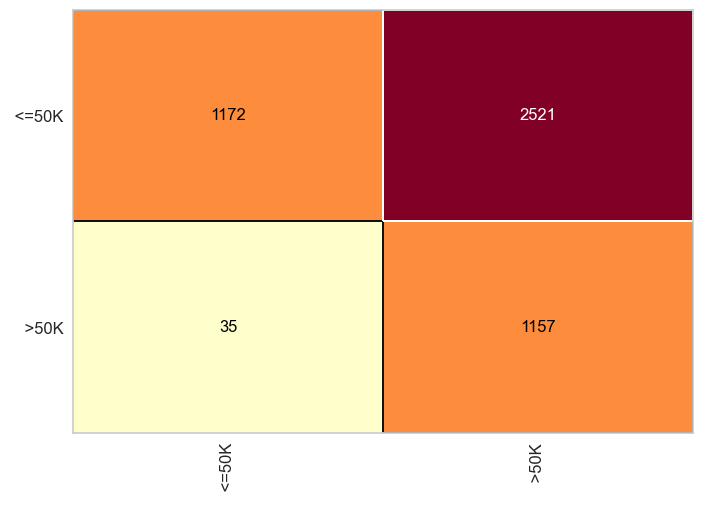

In [90]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento) # Fazer o mesmo treinamento com essa biblioteca
cm.score(x_census_teste, y_census_teste)

In [91]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



# Algoritmo: **Árvores de decisão**

## Base risco de crédito

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [94]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [95]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy') # Parâmetros: critério, entropia
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [96]:
arvore_risco_credito.feature_importances_ # Retorna a importância de cada um dos atributos (os que possuem o maior ganho de informação)

array([0.3362078 , 0.14179499, 0.03885431, 0.4831429 ])

In [97]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(0.5, 0.9, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.2, 0.7, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(0.3, 0.5, 'história <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4, 0.3, 'dívida <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.8, 0.7, 'história <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(0.7, 0.5, 'história <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = baixo'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = baixo'),
 Text

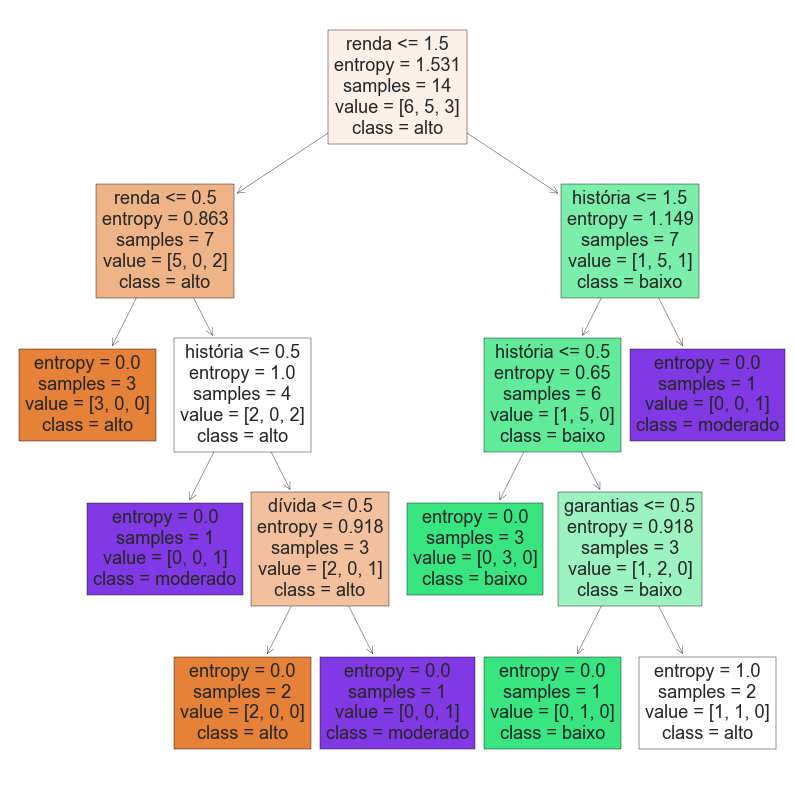

In [98]:
from sklearn import tree
previsores = ['história', 'dívida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names = arvore_risco_credito.classes_, filled=True)

In [99]:
# história boa  (0), dívida alta (0), garantias nenhuma  (1), renda > 35 (2)
# história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)
previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

Base credit data

In [100]:
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [101]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [102]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0) # Random para quando executar o algoritmo gerar os mesmos resultados p/ comparativo
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [103]:
previsoes = arvore_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [104]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [105]:
from sklearn.metrics import accuracy_score, classification_report

In [106]:
accuracy_score(y_credit_teste, previsoes)

0.982

0.982

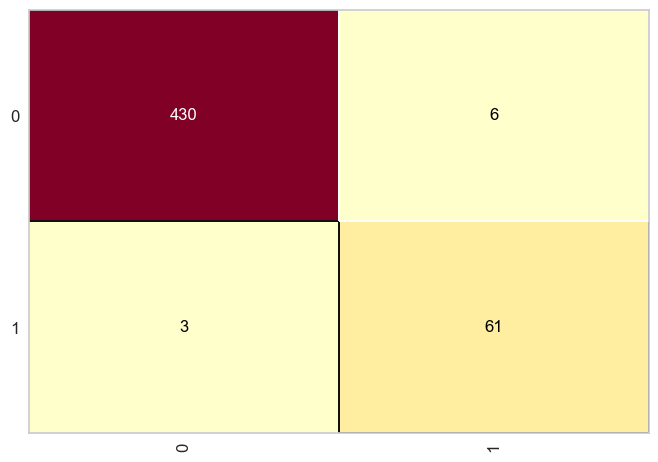

In [107]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

In [108]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



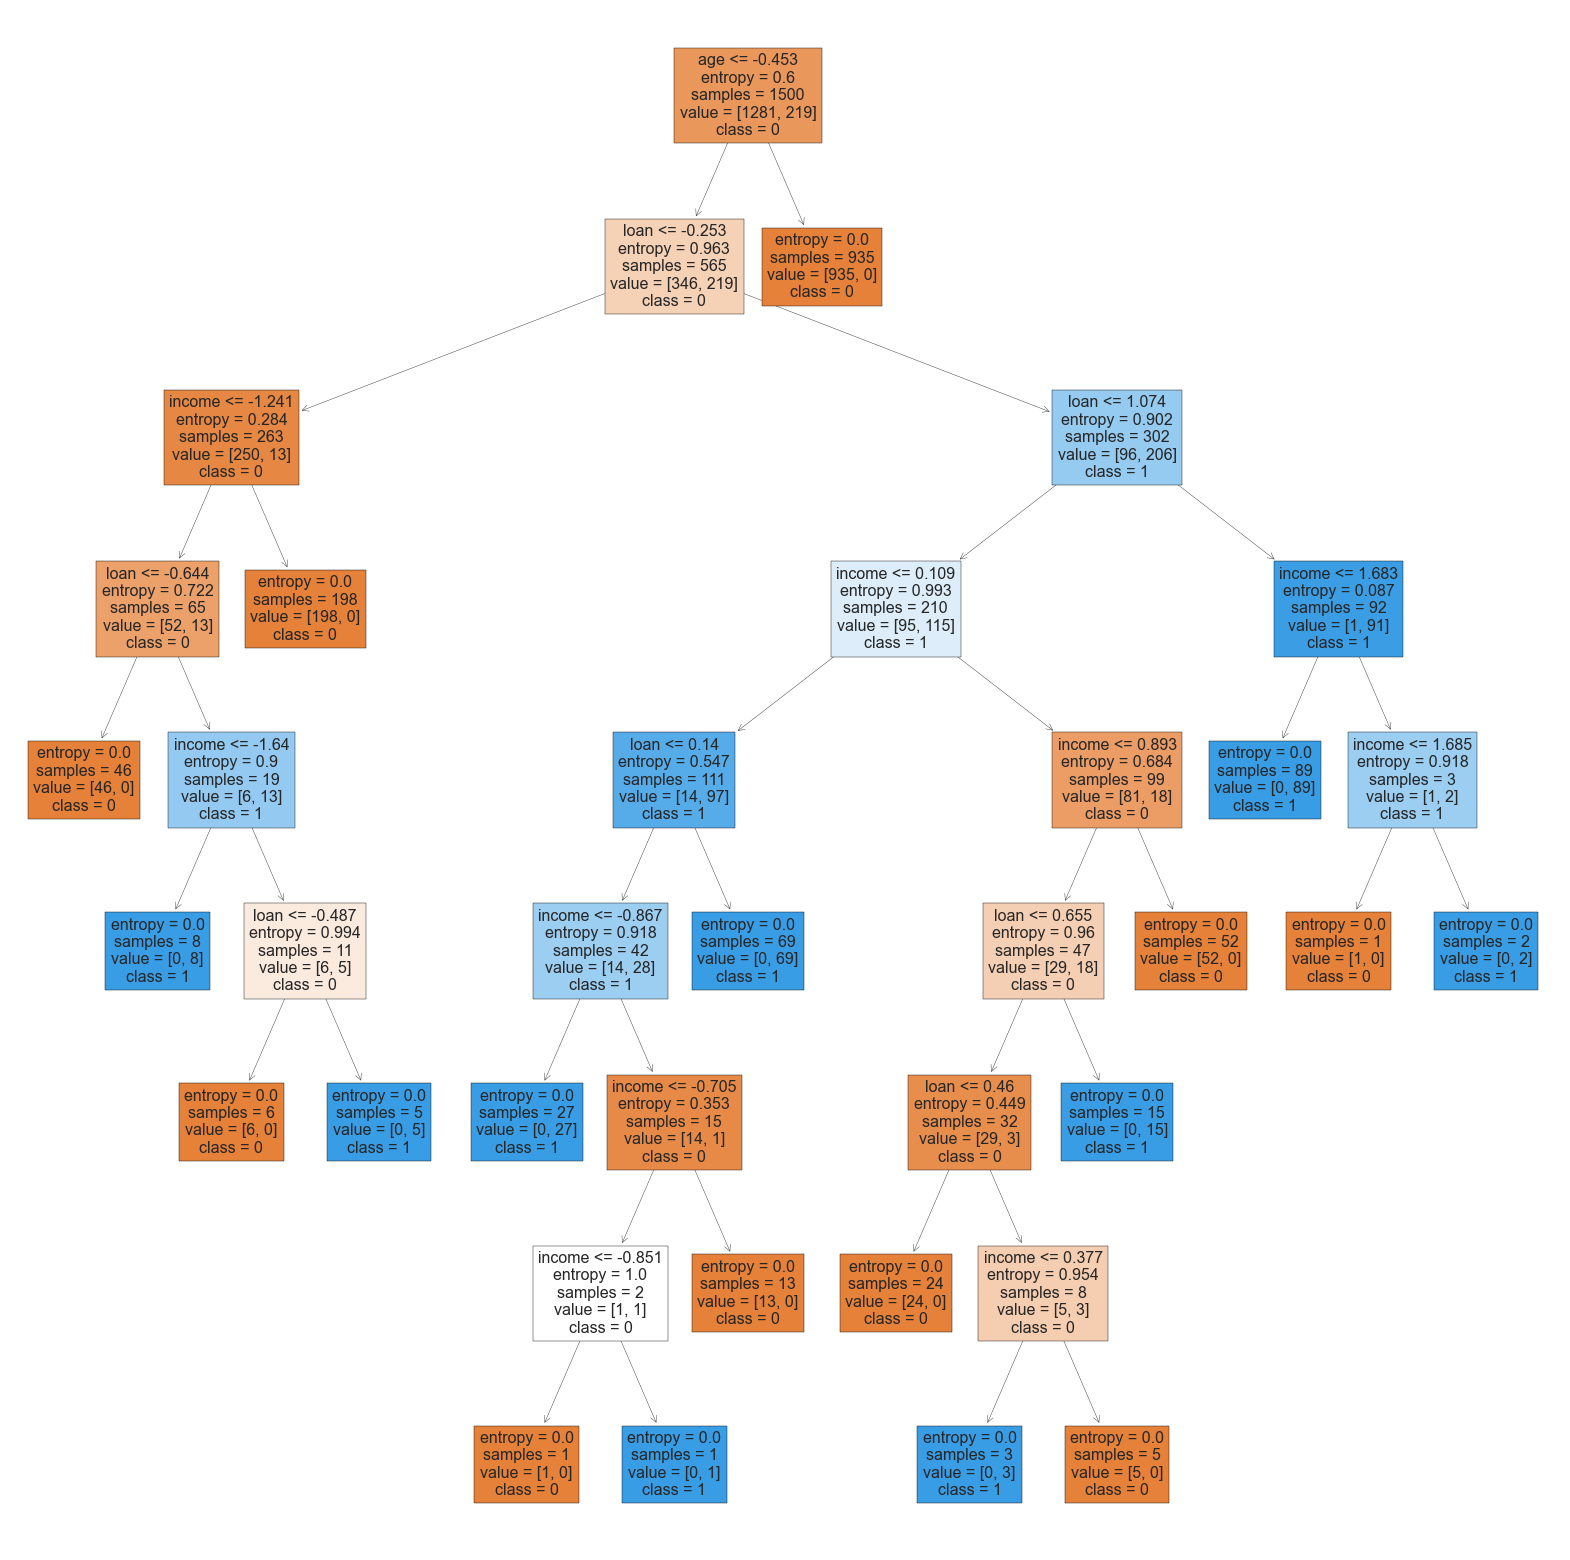

In [109]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit, feature_names=previsores, class_names = ['0','1'], filled=True);
figura.savefig('arvore_credit.png')

Base census

In [110]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [111]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [112]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(x_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [113]:
previsoes = arvore_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [114]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [115]:
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

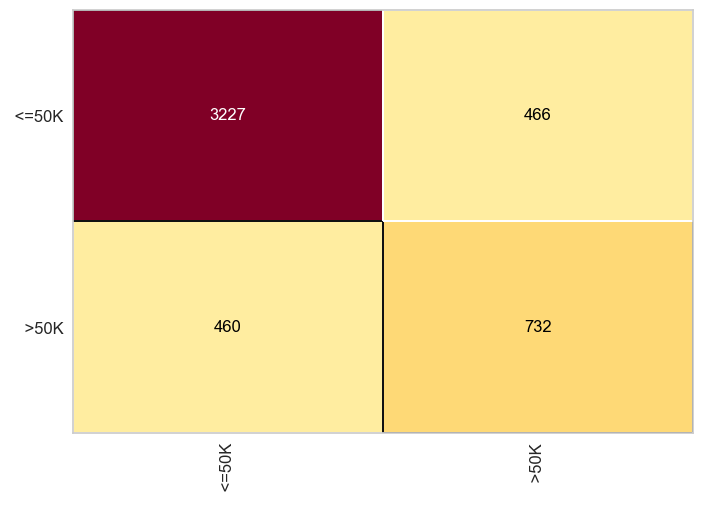

In [116]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

In [117]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Algoritmo: **Random Forest**

In [118]:
from sklearn.ensemble import RandomForestClassifier

### Base credit data

In [119]:
import pickle
with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [120]:
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [121]:
previsoes = random_forest_credit.predict(x_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [122]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

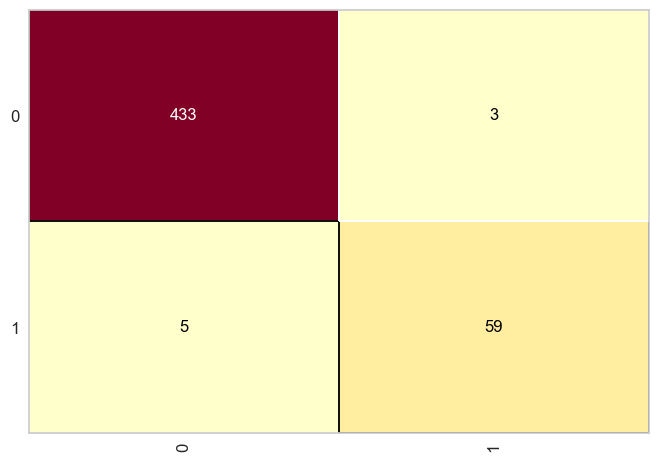

In [124]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

### Base Census

In [125]:
with open('census.pkl', 'rb') as f:
  x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [126]:
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_census.fit(x_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [127]:
previsoes = random_forest_census.predict(x_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [128]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [129]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

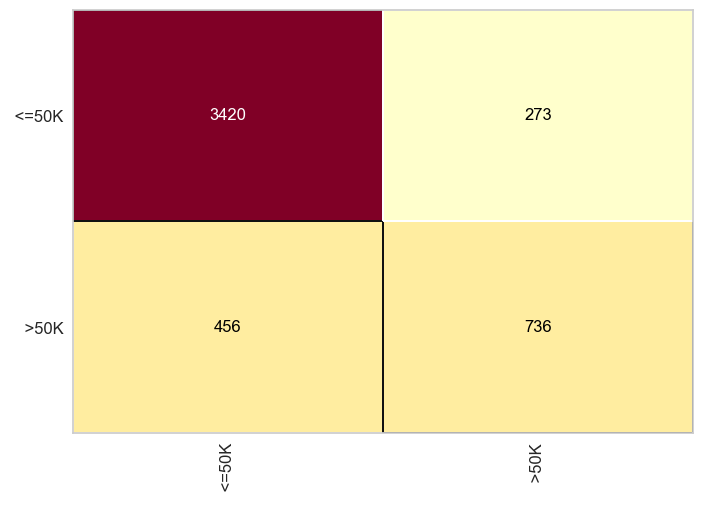

In [130]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)

# Algoritmo: **KNN - Aprendizagem baseada em instâncias**

In [131]:
from sklearn.neighbors import KNeighborsClassifier

## Base credit data - 98.60%

In [132]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [133]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [134]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [135]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2) # p = 1 calculo de distancia de manhattam; p = 2 calculo de distancia euclideana
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [136]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [137]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [138]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.986

0.986

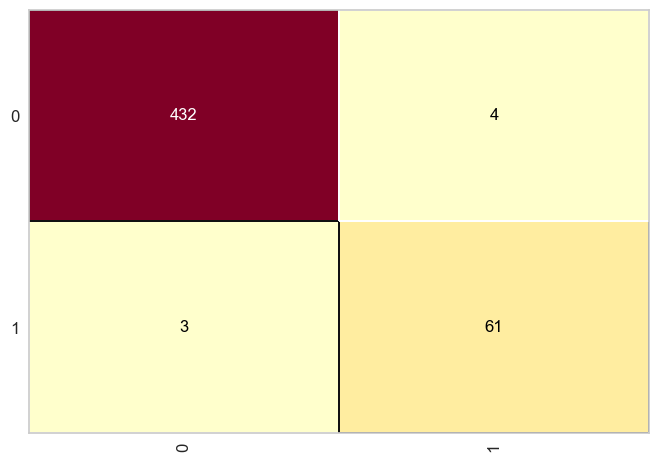

In [139]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [140]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



## Base census - 82.90%

In [141]:
with open('census.pkl', 'rb') as f:  
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [142]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [143]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [144]:
knn_census = KNeighborsClassifier(n_neighbors=10)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [145]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [146]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [147]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8290685772773797

0.8290685772773797

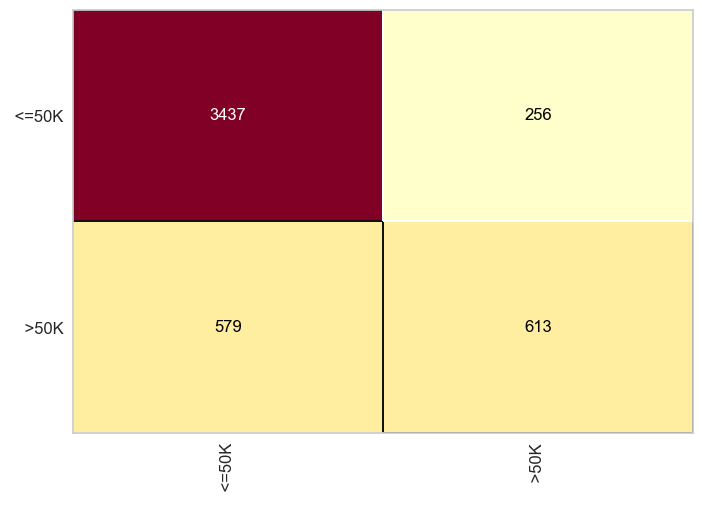

In [148]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [149]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



# Algoritmo: **SVM**

In [150]:
from sklearn.svm import SVC

## Base credit data

In [151]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [152]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 9.0)
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=9.0, random_state=1)

In [153]:
previsoes = svm_credit.predict(X_credit_teste)

In [154]:
accuracy_score(y_credit_teste, previsoes)

0.99

0.99

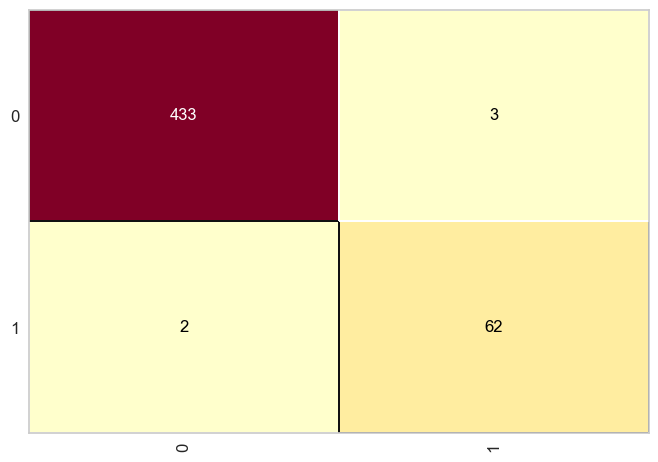

In [155]:
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

## Base Census

In [156]:
svm_census = SVC(kernel='linear', random_state = 1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

SVC(kernel='linear', random_state=1)

In [157]:
previsoes = svm_census.predict(X_census_teste)

In [158]:
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

0.8507676560900717

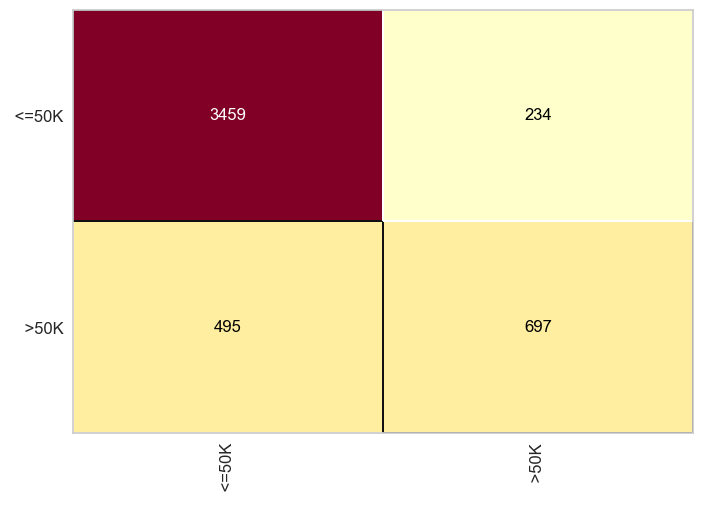

In [159]:
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

# Algortimo: **Redes Neurais**

In [160]:
from sklearn.neural_network import MLPClassifier

## Base credit data

In [161]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [162]:
X_credit_treinamento.shape, y_credit_treinamento.shape, X_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [163]:
# 3 -> 2 -> 2 -> 1
# 3 -> 100 -> 100 -> 1
rede_neural_credit = MLPClassifier(max_iter=2000, verbose=True, tol=0.0000100, activation='relu', hidden_layer_sizes=(2,2)) #hls= 2 camd ocultas com 100 neuronios
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.82124688
Iteration 2, loss = 0.81221852
Iteration 3, loss = 0.80344297
Iteration 4, loss = 0.79501136
Iteration 5, loss = 0.78668407
Iteration 6, loss = 0.77851199
Iteration 7, loss = 0.77051418
Iteration 8, loss = 0.76261448
Iteration 9, loss = 0.75478954
Iteration 10, loss = 0.74711718
Iteration 11, loss = 0.73941504
Iteration 12, loss = 0.73171440
Iteration 13, loss = 0.72425646
Iteration 14, loss = 0.71666453
Iteration 15, loss = 0.70897073
Iteration 16, loss = 0.70151358
Iteration 17, loss = 0.69390729
Iteration 18, loss = 0.68635096
Iteration 19, loss = 0.67883608
Iteration 20, loss = 0.67130723
Iteration 21, loss = 0.66379630
Iteration 22, loss = 0.65632218
Iteration 23, loss = 0.64875123
Iteration 24, loss = 0.64125278
Iteration 25, loss = 0.63369158
Iteration 26, loss = 0.62618047
Iteration 27, loss = 0.61845311
Iteration 28, loss = 0.61057911
Iteration 29, loss = 0.60285609
Iteration 30, loss = 0.59498104
Iteration 31, loss = 0.58711046
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(2, 2), max_iter=2000, tol=1e-05, verbose=True)

In [164]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [165]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [166]:
accuracy_score(y_credit_teste, previsoes)

0.998

0.998

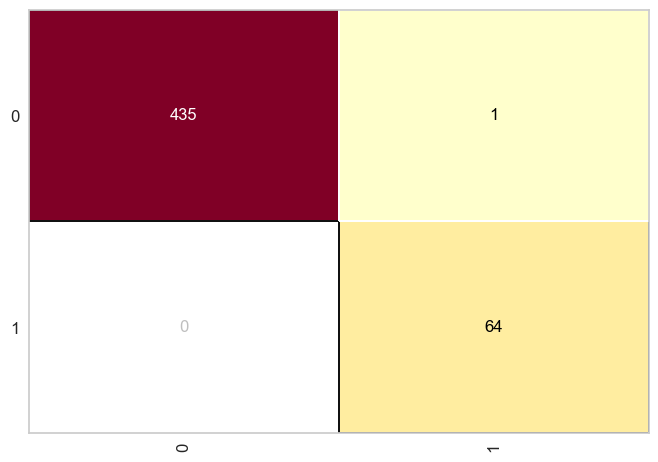

In [167]:
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [168]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



## Base census

In [169]:
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [170]:
X_census_treinamento.shape, y_census_treinamento.shape, X_census_teste.shape, y_census_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [171]:
# 108 entradas, 1 neuronio na camada de saida
(108 + 1) / 2

54.5

In [172]:
# 108 -> 55 -> 55 -> 1
rede_neural_census = MLPClassifier(max_iter=2000, verbose=True, tol=0.00000100, hidden_layer_sizes=(55, 55)) #hls= 2 camd ocultas com 100 neuronios
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

Iteration 1, loss = 0.38749908
Iteration 2, loss = 0.32760383
Iteration 3, loss = 0.31523327
Iteration 4, loss = 0.30775650
Iteration 5, loss = 0.30202275
Iteration 6, loss = 0.29788297
Iteration 7, loss = 0.29472633
Iteration 8, loss = 0.29138900
Iteration 9, loss = 0.28924106
Iteration 10, loss = 0.28728268
Iteration 11, loss = 0.28458301
Iteration 12, loss = 0.28319574
Iteration 13, loss = 0.28052551
Iteration 14, loss = 0.27913023
Iteration 15, loss = 0.27723344
Iteration 16, loss = 0.27561760
Iteration 17, loss = 0.27412345
Iteration 18, loss = 0.27243476
Iteration 19, loss = 0.27065718
Iteration 20, loss = 0.26919972
Iteration 21, loss = 0.26756547
Iteration 22, loss = 0.26576633
Iteration 23, loss = 0.26379900
Iteration 24, loss = 0.26239680
Iteration 25, loss = 0.26091047
Iteration 26, loss = 0.26091527
Iteration 27, loss = 0.25898931
Iteration 28, loss = 0.25720397
Iteration 29, loss = 0.25537158
Iteration 30, loss = 0.25443804
Iteration 31, loss = 0.25254120
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=2000, tol=1e-06,
              verbose=True)

In [173]:
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [174]:
accuracy_score(y_census_teste, previsoes)

0.812691914022518

0.812691914022518

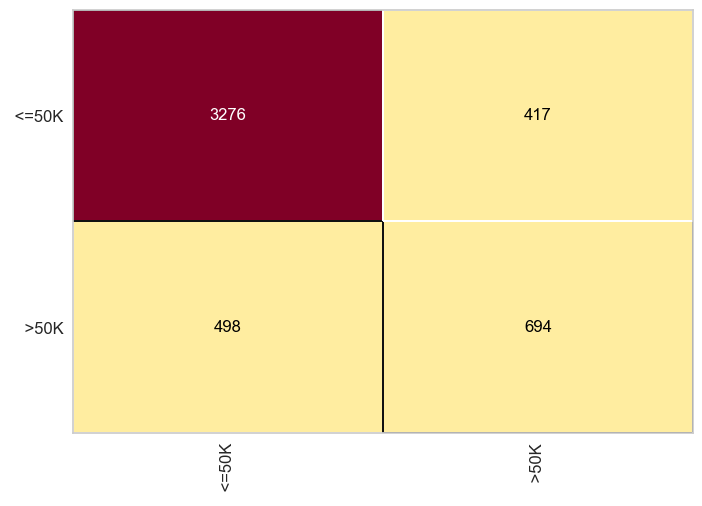

In [175]:
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [176]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      3693
        >50K       0.62      0.58      0.60      1192

    accuracy                           0.81      4885
   macro avg       0.75      0.73      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Algoritmo: **Regressão Logística**

## Base Risco Crédito

In [177]:
with open('risco_credito.pkl', 'rb') as f:
    X_risco_credito, y_risco_credito = pickle.load(f)

In [178]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [179]:
y_risco_credito # Apagar os registros moderado: 2, 7, 11 (formato numpyarray)

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [180]:
X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis = 0) # axis=0 significa que esta deletando as linhas/ axis=1 -> colunas
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis = 0)

In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
lr = LogisticRegression(random_state=1)
lr.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=1)

In [183]:
lr.intercept_

array([-0.80828993])

In [184]:
lr.coef_ #coeficientes p/ cada um dos parametros

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [185]:
previsoes_1 = lr.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsoes_1

array(['baixo', 'alto'], dtype=object)

## Base credit data

In [186]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [187]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [188]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [189]:
lr = LogisticRegression(random_state=1)
lr.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [190]:
lr.intercept_

array([-6.02976095])

In [191]:
lr.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [192]:
previsoes = lr.predict(X_credit_teste)

In [193]:
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [194]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [195]:
accuracy_score(y_credit_teste, previsoes)

0.946

In [196]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



## Base census

In [197]:
import pickle
with open('census.pkl', 'rb') as f:
    X_census_treinamento, y_censust_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [198]:
lr = LogisticRegression(random_state=1)
lr.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [199]:
previsoes = lr.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [200]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [201]:
accuracy_score(y_census_teste, previsoes)

0.849539406345957

In [202]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885



# **Tuning** dos parâmetros

Avaliação dos algoritmos antes do tuning:
* Naive Bayes: 93.80
* Árvore de decisão: 98.20
* Random Forest: 98.40
* Regras: 97.40
* KNN: 98.60
* Regressão Logística: 94.60
* SVM: 98.80
* Redes Neurais: 99.60

Avaliação dos algoritmos depois do tuning:
* Naive Bayes: 98.40
* Árvore de decisão: 98.70
* Random Forest: 98.40
* Regras: não feito
* KNN: 98.00
* Regressão Logística: 94.85
* SVM: 98.35
* Redes Neurais: 99.60

## Preparação dos dados

In [203]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [204]:
import pickle
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [205]:
X_credit_treinamento.shape, y_credit_treinamento.shape, x_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

In [206]:
# Concatenação das duas variáveis para validação cruzada
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
X_credit.shape

(2000, 3)

In [207]:
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)
y_credit.shape

(2000,)

## Algoritmos

In [208]:
# Parâmetros setados
parametros = {'criterion': ['gini', 'entropy'], # Impureza de gini e o calculo da entropia
              'splitter' : ['best', 'random'],  # Teste do best e o randomico
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],  # Valores 2 (default), 5 e 10
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}   # Valores 1 (default), 5 e 10

# Busca Árvore de Decisão
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros_arvore = grid_search.best_params_
melhor_resultado_arvore = grid_search.best_score_

In [209]:
# Parâmetros setados Random Forest
parametros = {'criterion': ['gini', 'entropy'],       # Impureza de gini e o calculo da entropia
              'n_estimators': [10, 40, 100, 150],     # Teste do best e o randomico
              'min_samples_split': [1, 7, 10],        # Valores 2 (default), 5 e 10
              'min_samples_leaf': [1, 3, 5, 7, 10]}   # Valores 1 (default), 5 e 10

# Busca Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros_rforest = grid_search.best_params_
melhor_resultado_rforest = grid_search.best_score_

In [210]:
# Parâmetros setados KNN
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

# Busca KNN
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros_knn = grid_search.best_params_
melhor_resultado_knn = grid_search.best_score_

In [211]:
# Parâmetros setados Regressão Logística
parametros = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

# Busca Regressão Logística
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros_reglogistica = grid_search.best_params_
melhor_resultado_reglogistica = grid_search.best_score_

In [212]:
# Parâmetros setados SVM
parametros = {'tol': [0.01, 0.001, 0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

# Busca SVM
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros_svm = grid_search.best_params_
melhor_resultado_svm = grid_search.best_score_

In [213]:
# Parâmetros setados Redes Neurais
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

# Busca redes neurais
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(X_credit, y_credit)
melhores_parametros_rneurais = grid_search.best_params_
melhor_resultado_rneurais = grid_search.best_score_

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\thi

In [214]:
print(f"""Tuning: Árvore de decisão\nbest_params: {melhores_parametros_arvore}\nbest_score: {melhor_resultado_arvore}\n
Tuning: Random Forest\nbest_params: {melhores_parametros_rforest}\nbest_score: {melhor_resultado_rforest}\n
Tuning: KNNeighbors\nbest_params: {melhores_parametros_knn}\nbest_score: {melhor_resultado_knn}\n
Tuning: Regressão Logística\nbest_params: {melhores_parametros_reglogistica}\nbest_score: {melhor_resultado_reglogistica}\n
Tuning: SVM\nbest_params: {melhores_parametros_svm}\nbest_score: {melhor_resultado_svm}\n
Tuning: Redes Neurais:\nbest_params: {melhores_parametros_rneurais}\nbest_score: {melhor_resultado_rneurais}""")

Tuning: Árvore de decisão
best_params: {'criterion': 'entropy', 'min_samples_leaf': 3, 'min_samples_split': 6, 'splitter': 'best'}
best_score: 0.9840000000000002

Tuning: Random Forest
best_params: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 100}
best_score: 0.986

Tuning: KNNeighbors
best_params: {'n_neighbors': 20, 'p': 1}
best_score: 0.9800000000000001

Tuning: Regressão Logística
best_params: {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
best_score: 0.9484999999999999

Tuning: SVM
best_params: {'C': 1.5, 'kernel': 'rbf', 'tol': 0.01}
best_score: 0.9835

Tuning: Redes Neurais:
best_params: {'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
best_score: 0.9955000000000002


# **Validação cruzada**

In [215]:
from sklearn.model_selection import cross_val_score, KFold

In [216]:
10 * 30

300

In [217]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    # n_splits = base dividida em 10 pedaços e a cada rodada 9 pedaços de treinamento e 1 para teste | 
    # shuffle = True o algoritmo sempre misture os dados | 
    # random_state = indica que a cada execução teremos resultados diferentes
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    # Parâmetros do tuning
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    # Kfold para dividir e cross_val_score recebe e faz os testes
    scores = cross_val_score(arvore, X_credit, y_credit, cv = kfold)
    resultados_arvore.append(scores.mean())

    random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split = 7, n_estimators = 100)
    scores = cross_val_score(random_forest, X_credit, y_credit, cv = kfold)
    resultados_random_forest.append(scores.mean())

    knn = KNeighborsClassifier(n_neighbors = 20, p = 1)
    scores = cross_val_score(knn, X_credit, y_credit, cv = kfold)
    resultados_knn.append(scores.mean())

    logistica = LogisticRegression(C = 1.0, solver= 'lbfgs', tol= 0.0001)
    scores = cross_val_score(logistica, X_credit, y_credit, cv = kfold)
    resultados_logistica.append(scores.mean())

    svm = SVC(C= 1.5, kernel= 'rbf', tol= 0.01)
    scores = cross_val_score(svm, X_credit, y_credit, cv = kfold)
    resultados_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation= 'relu', batch_size= 56, solver= 'adam')
    scores = cross_val_score(rede_neural, X_credit, y_credit, cv = kfold)
    resultados_rede_neural.append(scores.mean())

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

c:\Users\thi

In [218]:
resultados = pd.DataFrame({'Árvore': resultados_arvore, 'Random forest': resultados_random_forest,
                           'KNN': resultados_knn, 'Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede Neural': resultados_rede_neural})

In [219]:
resultados

Árvore  Random forest     KNN  Logistica     SVM  Rede Neural
0   0.9865         0.9880  0.9800     0.9475  0.9835       0.9970
1   0.9845         0.9870  0.9800     0.9465  0.9835       0.9980
2   0.9905         0.9870  0.9800     0.9470  0.9835       0.9970
3   0.9875         0.9860  0.9800     0.9460  0.9850       0.9975
4   0.9885         0.9880  0.9810     0.9465  0.9855       0.9975
5   0.9890         0.9880  0.9785     0.9465  0.9835       0.9970
6   0.9880         0.9890  0.9800     0.9470  0.9840       0.9975
7   0.9875         0.9880  0.9805     0.9480  0.9845       0.9975
8   0.9860         0.9840  0.9810     0.9465  0.9825       0.9970
9   0.9870         0.9880  0.9810     0.9465  0.9835       0.9970
10  0.9860         0.9850  0.9780     0.9475  0.9825       0.9955
11  0.9900         0.9890  0.9805     0.9480  0.9825       0.9975
12  0.9890         0.9870  0.9810     0.9475  0.9840       0.9970
13  0.9870         0.9870  0.9800     0.9475  0.9840       0.9975
14  0.9850         0.9875  0.9795     0.9485  0.9835       0.9965
15  0.9855         0.9850  0.9795     0.9475  0.9840       0.9980
16  0.9855         0.9850  0.9805     0.9460  0.9845       0.9960
17  0.9905         0.9890  0.9830     0.9470  0.9845       0.9970
18  0.9875         0.9875  0.9800     0.9465  0.9845       0.9970
19  0.9870         0.9885  0.9805     0.9465  0.9840       0.9970
20  0.9840         0.9855  0.9800     0.9465  0.9835       0.9975
21  0.9870         0.9860  0.9810     0.9470  0.9845       0.9985
22  0.9885         0.9875  0.9810     0.9455  0.9845       0.9975
23  0.9870         0.9870  0.9800     0.9465  0.9870       0.9970
24  0.9875         0.9885  0.9835     0.9470  0.9835       0.9970
25  0.9880         0.9885  0.9815     0.9470  0.9820       0.9975
26  0.9875         0.9875  0.9795     0.9475  0.9825       0.9970
27  0.9860         0.9850  0.9795     0.9465  0.9850       0.9965
28  0.9865         0.9860  0.9775     0.9480  0.9830       0.9965
29  0.9885         0.9880  0.9780     0.9465  0.9860       0.9965

In [220]:
resultados.describe()

Árvore  Random forest        KNN  Logistica        SVM  Rede Neural
count  30.000000      30.000000  30.000000  30.000000  30.000000    30.000000
mean    0.987283       0.987100   0.980200   0.946950   0.983950     0.997117
std     0.001622       0.001386   0.001270   0.000687   0.001093     0.000597
min     0.984000       0.984000   0.977500   0.945500   0.982000     0.995500
25%     0.986125       0.986000   0.979625   0.946500   0.983500     0.997000
50%     0.987250       0.987500   0.980000   0.947000   0.984000     0.997000
75%     0.988375       0.988000   0.981000   0.947500   0.984500     0.997500
max     0.990500       0.989000   0.983500   0.948500   0.987000     0.998500

In [221]:
resultados.var()

Árvore           2.632471e-06
Random forest    1.920690e-06
KNN              1.613793e-06
Logistica        4.715517e-07
SVM              1.195690e-06
Rede Neural      3.566092e-07
dtype: float64

In [222]:
(resultados.std() / resultados.mean() ) * 100 # Coeficiente de variação

Árvore           0.164339
Random forest    0.140400
KNN              0.129601
Logistica        0.072517
SVM              0.111131
Rede Neural      0.059889
dtype: float64

# Teste de normalidade nos resultados

In [223]:
alpha = 0.05

In [224]:
from scipy.stats import shapiro

In [225]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_logistica), shapiro(resultados_svm), shapiro(resultados_rede_neural),

(ShapiroResult(statistic=0.9779022336006165, pvalue=0.767456591129303),
 ShapiroResult(statistic=0.925697922706604, pvalue=0.0377889983355999),
 ShapiroResult(statistic=0.9244037866592407, pvalue=0.0349433459341526),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9471532106399536, pvalue=0.14177390933036804),
 ShapiroResult(statistic=0.9213963747024536, pvalue=0.029158394783735275))

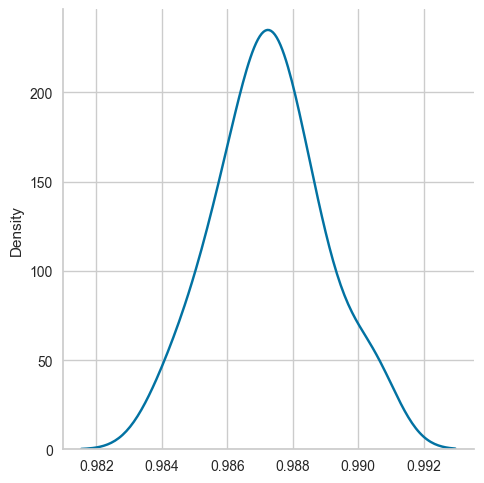

In [226]:
sns.displot(resultados_arvore, kind = 'kde') # Distribuição normal

# Teste de hipótese com ANOVA e Turkey

In [227]:
from scipy.stats import f_oneway
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural)
p

2.342575972645911e-196

In [228]:
alpha = 0.05
if p <= alpha:
    print("Hipótese nula rejeitada. Dados são diferentes")
else:
    print("Hipótese alternativa rejeitada. Resultados são iguais")

Hipótese nula rejeitada. Dados são diferentes


In [229]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn, resultados_logistica, resultados_svm, resultados_rede_neural]),
                         'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore','arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                         'arvore', 'arvore', 'arvore', 'arvore', 'arvore' ,'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                         'random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest','random_forest', 'random_forest', 'random_forest', 'random_forest', 
                         'random_forest','random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest','random_forest', 'random_forest', 'random_forest', 
                         'random_forest', 'random_forest','random_forest', 'random_forest', 'random_forest', 'random_forest', 'random_forest','random_forest', 'random_forest', 
                         'random_forest', 'random_forest', 'random_forest', 'knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn',
                         'knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn', 'logistica', 'logistica', 'logistica', 'logistica',
                         'logistica','logistica', 'logistica', 'logistica', 'logistica', 'logistica','logistica', 'logistica', 'logistica', 'logistica', 'logistica','logistica', 
                         'logistica', 'logistica', 'logistica', 'logistica','logistica', 'logistica', 'logistica', 'logistica', 'logistica','logistica', 'logistica', 'logistica', 
                         'logistica', 'logistica', 'svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm',
                         'svm','svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm', 'svm','rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural','rede_neural',
                         'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural','rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural','rede_neural', 'rede_neural',
                         'rede_neural', 'rede_neural', 'rede_neural','rede_neural', 'rede_neural', 'rede_neural', 'rede_neural', 'rede_neural','rede_neural', 'rede_neural', 'rede_neural', 
                         'rede_neural', 'rede_neural']}

In [230]:
resultados_df = pd.DataFrame(resultados_algoritmos)
resultados_df.tail(60)

accuracy    algoritmo
120    0.9835          svm
121    0.9835          svm
122    0.9835          svm
123    0.9850          svm
124    0.9855          svm
125    0.9835          svm
126    0.9840          svm
127    0.9845          svm
128    0.9825          svm
129    0.9835          svm
130    0.9825          svm
131    0.9825          svm
132    0.9840          svm
133    0.9840          svm
134    0.9835          svm
135    0.9840          svm
136    0.9845          svm
137    0.9845          svm
138    0.9845          svm
139    0.9840          svm
140    0.9835          svm
141    0.9845          svm
142    0.9845          svm
143    0.9870          svm
144    0.9835          svm
145    0.9820          svm
146    0.9825          svm
147    0.9850          svm
148    0.9830          svm
149    0.9860          svm
150    0.9970  rede_neural
151    0.9980  rede_neural
152    0.9970  rede_neural
153    0.9975  rede_neural
154    0.9975  rede_neural
155    0.9970  rede_neural
156    0.9975  rede_neural
157    0.9975  rede_neural
158    0.9970  rede_neural
159    0.9970  rede_neural
160    0.9955  rede_neural
161    0.9975  rede_neural
162    0.9970  rede_neural
163    0.9975  rede_neural
164    0.9965  rede_neural
165    0.9980  rede_neural
166    0.9960  rede_neural
167    0.9970  rede_neural
168    0.9970  rede_neural
169    0.9970  rede_neural
170    0.9975  rede_neural
171    0.9985  rede_neural
172    0.9975  rede_neural
173    0.9970  rede_neural
174    0.9970  rede_neural
175    0.9975  rede_neural
176    0.9970  rede_neural
177    0.9965  rede_neural
178    0.9965  rede_neural
179    0.9965  rede_neural

In [231]:
from statsmodels.stats.multicomp import MultiComparison

In [232]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [233]:
teste_estatistico = compara_algoritmos.tukeyhsd()
print(teste_estatistico)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
       arvore           knn  -0.0071    0.0  -0.008 -0.0062   True
       arvore     logistica  -0.0403    0.0 -0.0412 -0.0395   True
       arvore random_forest  -0.0002 0.9904 -0.0011  0.0007  False
       arvore   rede_neural   0.0098    0.0   0.009  0.0107   True
       arvore           svm  -0.0033    0.0 -0.0042 -0.0025   True
          knn     logistica  -0.0333    0.0 -0.0341 -0.0324   True
          knn random_forest   0.0069    0.0   0.006  0.0078   True
          knn   rede_neural   0.0169    0.0   0.016  0.0178   True
          knn           svm   0.0037    0.0  0.0029  0.0046   True
    logistica random_forest   0.0401    0.0  0.0393   0.041   True
    logistica   rede_neural   0.0502    0.0  0.0493   0.051   True
    logistica           svm    0.037    0.0  0.0361  0.0379   

In [234]:
resultados.mean()

Árvore           0.987283
Random forest    0.987100
KNN              0.980200
Logistica        0.946950
SVM              0.983950
Rede Neural      0.997117
dtype: float64

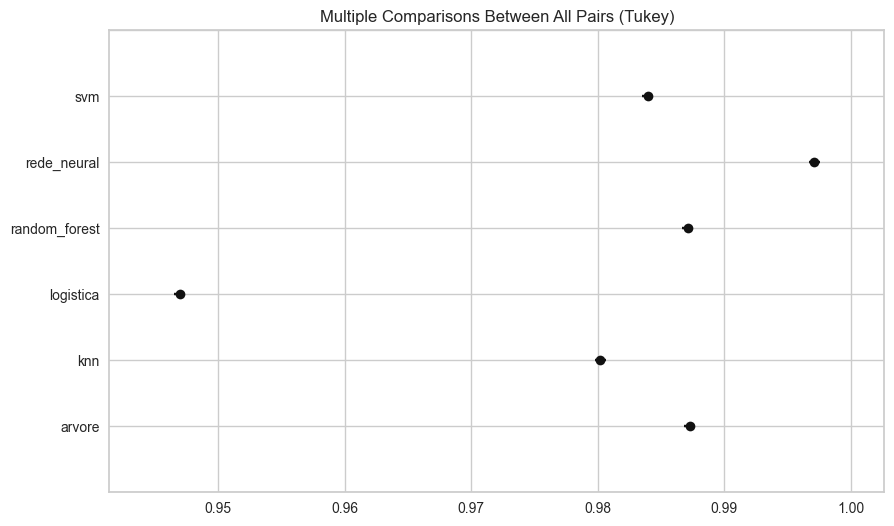

In [235]:
teste_estatistico.plot_simultaneous();

# Salvar um classificador já treinado

In [236]:
import pickle
with open('credit.pkl', 'rb') as f: # read
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [237]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
y_credit = np.concatenate((y_credit_treinamento, y_credit_teste), axis = 0)

In [238]:
classificador_rede_neural = MLPClassifier(activation='relu', batch_size = 56, solver='adam')
classificador_rede_neural.fit(X_credit, y_credit)

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(batch_size=56)

In [239]:
classificador_arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
classificador_arvore.fit(X_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [240]:
classificador_svm = SVC(C= 1.5, kernel= 'rbf', tol= 0.01, probability=True)
classificador_svm.fit(X_credit, y_credit)

SVC(C=1.5, probability=True, tol=0.01)

In [241]:
import pickle
pickle.dump(classificador_rede_neural, open('rede_neural_finalizado.sav', 'wb'))
pickle.dump(classificador_arvore, open('arvore_finalizado.sav', 'wb'))
pickle.dump(classificador_svm, open('svm_finalizado.sav', 'wb'))

# Carregar um classificador já treinado

In [242]:
rede_neural = pickle.load(open('rede_neural_finalizado.sav', 'rb'))
arvore = pickle.load(open('arvore_finalizado.sav', 'rb'))
svm = pickle.load(open('svm_finalizado.sav', 'rb'))

In [243]:
novo_registro = X_credit[1999]
novo_registro.shape

(3,)

In [244]:
novo_registro = novo_registro.reshape(1, -1)
rede_neural.predict(novo_registro)

array([1], dtype=int64)

In [245]:
arvore.predict(novo_registro)

array([1], dtype=int64)

In [246]:
svm.predict(novo_registro)

array([1], dtype=int64)

# Combinação de classificadores

In [247]:
novo_registro = X_credit[1999]
novo_registro = novo_registro.reshape(1, -1)
novo_registro, novo_registro.shape

(array([[-1.03572293, -0.93978122,  0.04244312]]), (1, 3))

In [248]:
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)

In [249]:
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0], 

(1, 1, 1)

In [250]:
paga = 0
nao_paga = 0

if resposta_rede_neural[0] == 1:
    nao_paga += 1
else:
    paga += 1

if resposta_arvore[0] == 1:
    nao_paga += 1
else:
    paga += 1

if resposta_svm[0] == 1:
    nao_paga += 1
else:
    paga += 1

if paga > nao_paga:
    print("Cliente pagará o empréstimo")
elif paga == nao_paga:
    print("Empate")
else:
    print("Cliente não pagará o empréstimo")


Cliente não pagará o empréstimo


# Rejeição de classificadores

In [251]:
novo_registro = X_credit[0]
novo_registro = novo_registro.reshape(1, -1)
resposta_rede_neural = rede_neural.predict(novo_registro)
resposta_arvore = arvore.predict(novo_registro)
resposta_svm = svm.predict(novo_registro)
resposta_rede_neural[0], resposta_arvore[0], resposta_svm[0]

(0, 0, 0)

In [252]:
probabilidade_rede_neural = rede_neural.predict_proba(novo_registro)
probabilidade_rede_neural

array([[1.00000000e+00, 3.12166008e-17]])

In [253]:
confianca_rede_neural = probabilidade_rede_neural.max()
confianca_rede_neural

1.0

In [254]:
probabilidade_arvore = arvore.predict_proba(novo_registro)
confianca_arvore = probabilidade_arvore.max()
confianca_arvore

1.0

In [255]:
probabilidade_svm = svm.predict_proba(novo_registro)
confianca_svm = probabilidade_svm.max()
confianca_svm

0.9999966781564348

In [256]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_rede_neural >= confianca_minima:
    algoritmos += 1
    if resposta_rede_neural[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if confianca_arvore >= confianca_minima:
    algoritmos += 1
    if resposta_arvore[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if confianca_svm >= confianca_minima:
    algoritmos += 1
    if resposta_svm[0] == 1:
        nao_paga += 1
    else:
        paga += 1

if paga > nao_paga:
    print("Cliente pagará o empréstimo, baseado em {} algoritmos".format(algoritmos))
elif paga == nao_paga:
    print("Empate, baseado em {} algoritmos".format(algoritmos))
else:
    print("Cliente não pagará o empréstimo, baseado em {} algoritmos".format(algoritmos))

Cliente pagará o empréstimo, baseado em 2 algoritmos


# Algoritmo: **Regressão Linear**

## Regressão Linear Simples

### Base plano saúde

In [257]:
base_plano_saude = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\plano_saude.csv')

In [258]:
X_plano_saude = base_plano_saude.iloc[:, 0].values
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [259]:
y_plano_saude = base_plano_saude.iloc[:, 1].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090],
      dtype=int64)

In [260]:
np.corrcoef(X_plano_saude, y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [261]:
X_plano_saude = X_plano_saude.reshape(-1, 1)
X_plano_saude # formato de matriz

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [262]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [263]:
regressor_plano_saude.intercept_ # Inicio da linha de regressão

-558.9490909090912

In [264]:
regressor_plano_saude.coef_ # Declive da linha

array([61.86787879])

In [265]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [266]:
# Voltar o valor para o formato de vetor (10, 1) -> (10, 0)
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63], dtype=int64)

In [267]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = "Regressão Linear")
grafico.show()

In [268]:
regressor_plano_saude.intercept_ + regressor_plano_saude.coef_ * 40

array([1915.76606061])

In [269]:
regressor_plano_saude.predict([[40]])

array([1915.76606061])

In [270]:
regressor_plano_saude.score(X_plano_saude, y_plano_saude)

0.8666112727879174

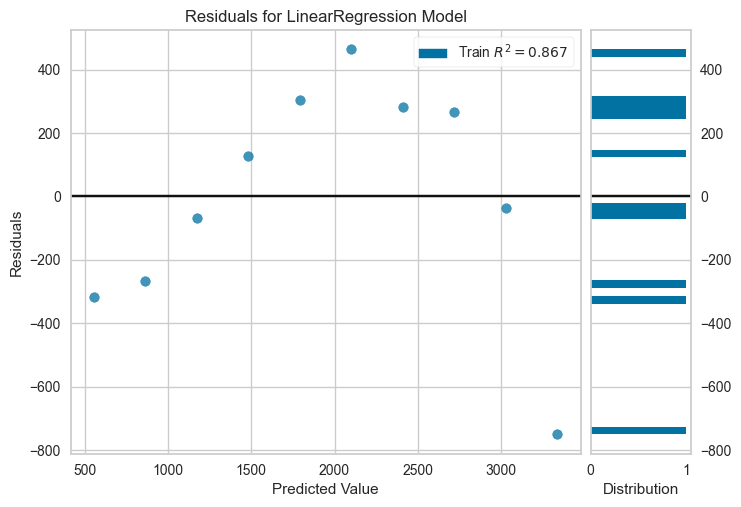

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [271]:
from yellowbrick.regressor import ResidualsPlot
visualizador = ResidualsPlot(regressor_plano_saude)
visualizador.fit(X_plano_saude, y_plano_saude)
visualizador.poof()

### Base preço das casas

In [272]:
base_casas = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\house_prices.csv')

In [273]:
base_casas.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [274]:
base_casas.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [275]:
base_casas.corr()

C:\Users\thiag\AppData\Local\Temp\ipykernel_5052\4101421808.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

C:\Users\thiag\AppData\Local\Temp\ipykernel_5052\1836196311.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



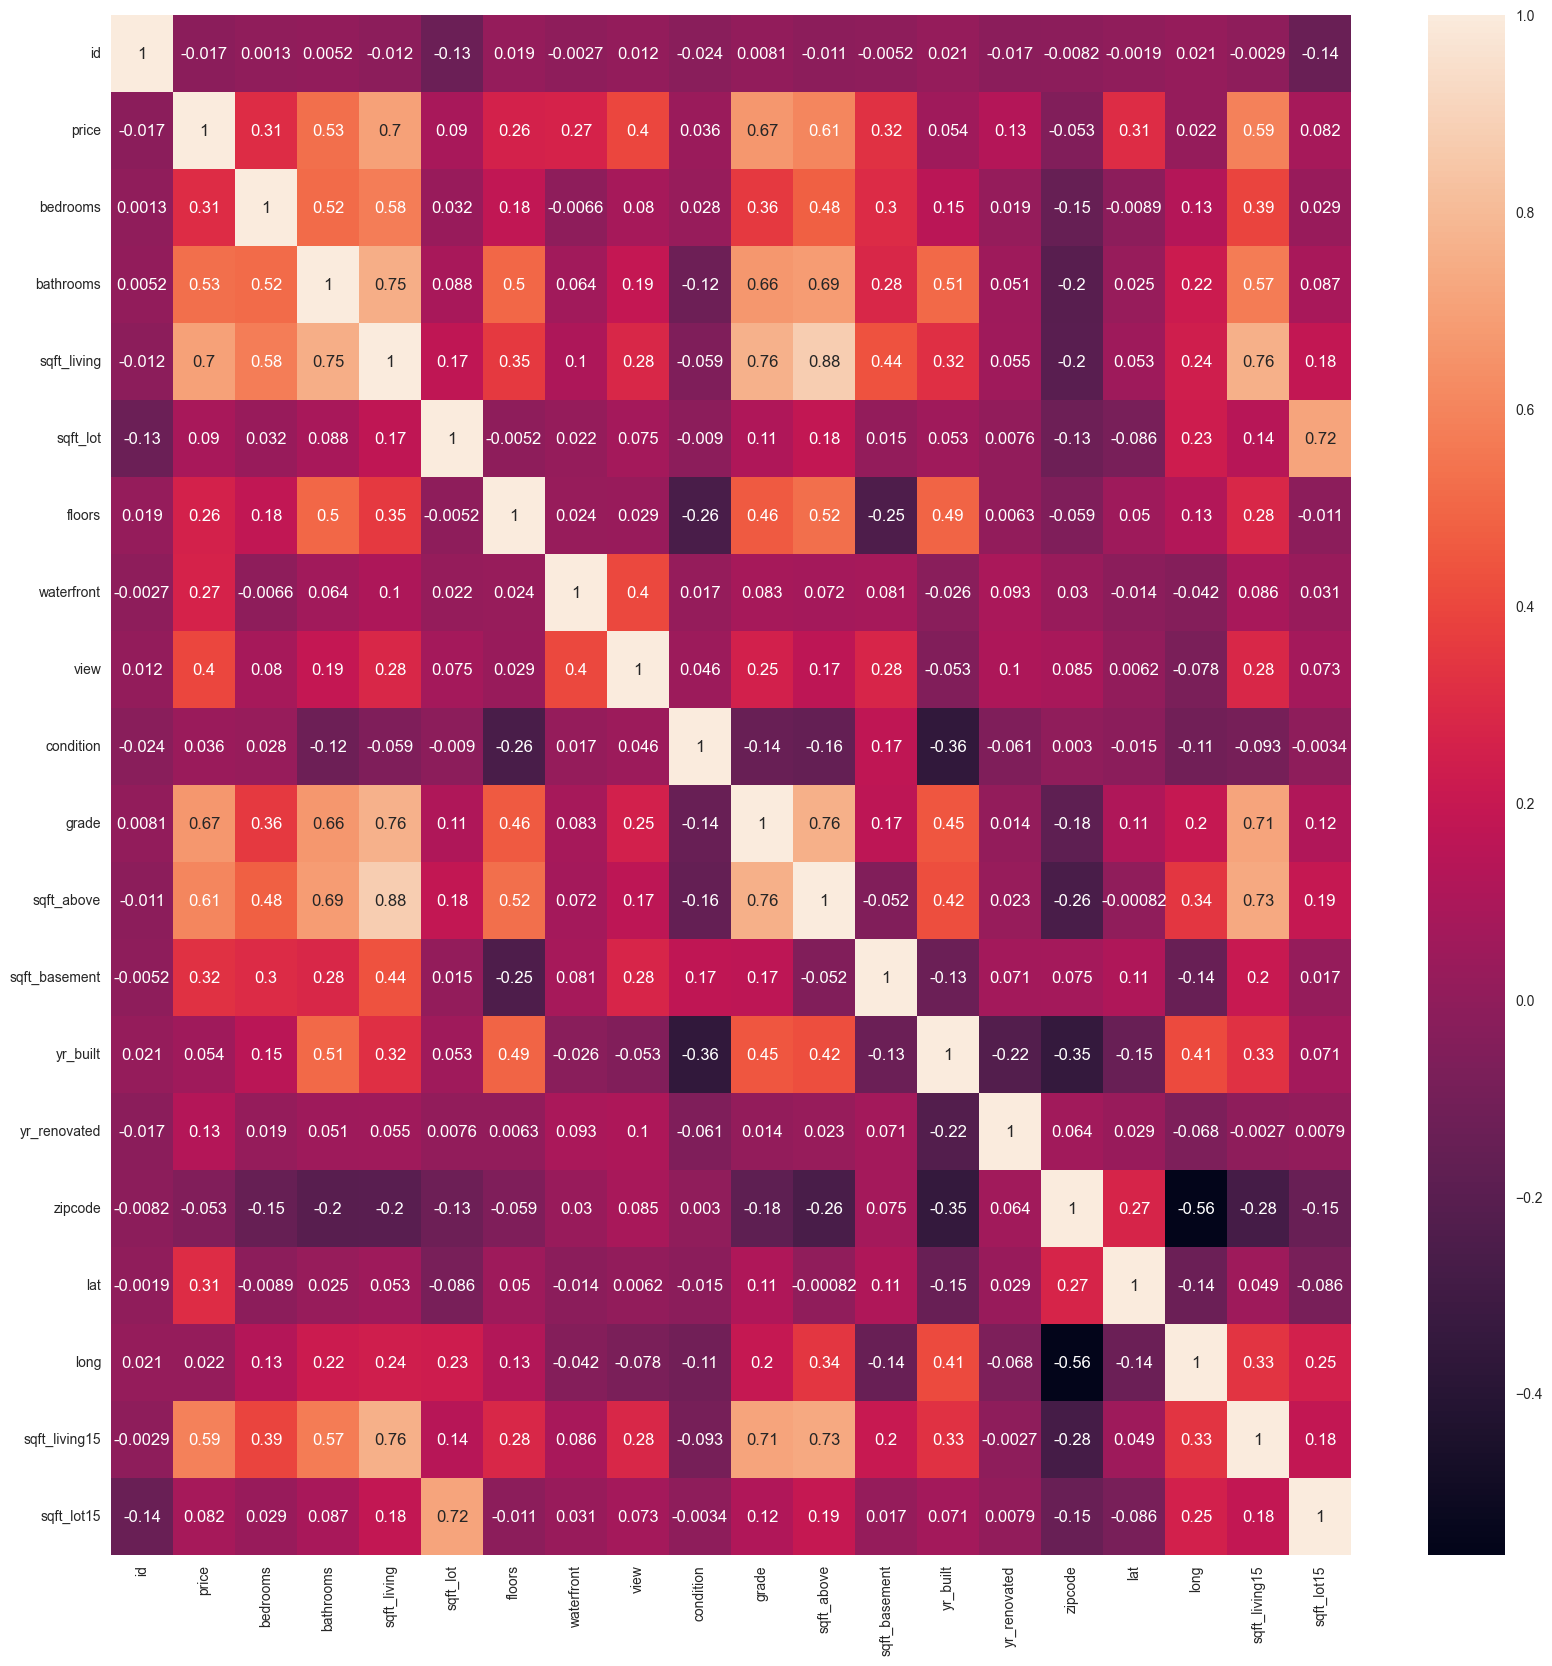

In [276]:
figura = plt.figure(figsize = (20, 20))
sns.heatmap(base_casas.corr(), annot=True);

In [277]:
X_casas = base_casas.iloc[:, 5:6].values
X_casas

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [278]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [279]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

In [280]:
X_casas_treinamento.shape, y_casas_treinamento.shape

((15129, 1), (15129,))

In [281]:
X_casas_teste.shape, y_casas_teste.shape

((6484, 1), (6484,))

In [282]:
from sklearn.linear_model import LinearRegression
regressor_simples_casas = LinearRegression()
regressor_simples_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [283]:
#b0
regressor_simples_casas.intercept_

-37893.59850106703

In [284]:
#b1
regressor_simples_casas.coef_

array([278.32860644])

In [285]:
regressor_simples_casas.score(X_casas_treinamento, y_casas_treinamento)

0.49453356717789776

In [286]:
regressor_simples_casas.score(X_casas_teste, y_casas_teste)

0.48889929019453016

In [287]:
previsoes = regressor_simples_casas.predict(X_casas_treinamento)
previsoes

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [288]:
grafico = px.scatter(x = X_casas_treinamento.ravel(), y = previsoes)
grafico.show()

In [289]:
import plotly.graph_objects as go
grafico_1 = grafico = px.scatter(x = X_casas_treinamento.ravel(), y = y_casas_treinamento)
grafico_2 = px.line(x = X_casas_treinamento.ravel(), y = previsoes)
grafico_2.data[0].line.color = 'red'
grafico_3 = go.Figure(data = grafico_1.data + grafico_2.data)
grafico_3

In [290]:
previsoes_teste = regressor_simples_casas.predict(X_casas_teste)
previsoes_teste

array([ 360116.30871034, 1261900.99358095,  362899.59477476, ...,
        560512.90534826,  374032.73903242,  329500.16200177])

In [291]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [292]:
# Calculo da diferenças entre os valores de previsoes e teste
abs(y_casas_teste - previsoes_teste).mean()

172604.12889995414

In [293]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_casas_teste, previsoes_teste)

172604.12889995414

In [294]:
mean_squared_error(y_casas_teste, previsoes_teste)

70170013932.11592

In [295]:
np.sqrt(mean_squared_error(y_casas_teste, previsoes_teste))

264896.23238565685

In [296]:
grafico_1 = grafico = px.scatter(x = X_casas_teste.ravel(), y = y_casas_teste)
grafico_2 = px.line(x = X_casas_teste.ravel(), y = previsoes_teste)
grafico_2.data[0].line.color = 'red'
grafico_3 = go.Figure(data = grafico_1.data + grafico_2.data)
grafico_3

## Regressão Linear Múltipla

In [297]:
base_casas

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [298]:
X_casas = base_casas.iloc[:, 3:19].values
X_casas

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [299]:
y_casas = base_casas.iloc[:, 2].values
y_casas

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [300]:
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [301]:
X_casas_treinamento.shape, y_casas_teste.shape

((15129, 16), (6484,))

In [302]:
regressor_multiplo_casas = LinearRegression()
regressor_multiplo_casas.fit(X_casas_treinamento, y_casas_treinamento)

LinearRegression()

In [303]:
regressor_multiplo_casas.intercept_

5736222.703412161

In [304]:
regressor_multiplo_casas.coef_ #Cada um tem seu coeficiente

array([-3.08423090e+04,  3.66540816e+04,  1.12179158e+02,  8.00604120e-03,
        9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
        1.01092121e+05,  6.96565321e+01,  4.25226267e+01, -2.60724691e+03,
        1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05])

In [305]:
len(regressor_multiplo_casas.coef_ ) #um coeficiente para cada um dos 16 atributos

16

In [306]:
regressor_multiplo_casas.score(X_casas_treinamento, y_casas_treinamento)

0.7029888085955007

In [307]:
regressor_multiplo_casas.score(X_casas_teste, y_casas_teste)

0.6885414149062644

In [308]:
previsoes = regressor_multiplo_casas.predict(X_casas_teste)
previsoes

array([ 383751.77768702, 1514216.17517451,  546921.96179115, ...,
        314968.5762327 ,  219405.55573559,  148128.83467042])

In [309]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [310]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

123888.44377485868

# Algoritmo: **Regressão Polinomial**

## Base plano de saúde

In [311]:
base_plano_saude_2 = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\plano_saude2.csv')
base_plano_saude_2

idade  custo
0     18    470
1     23    520
2     28    630
3     33    830
4     38   1150
5     43   1530
6     48   2040
7     53   3080
8     58   5100
9     63  10100

In [312]:
X_plano_saude_2 = base_plano_saude_2.iloc[:, 0:1].values
y_plano_saude_2 = base_plano_saude_2.iloc[:, 1].values

In [313]:
X_plano_saude_2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [314]:
y_plano_saude_2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [315]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4) #degree=quantas vezes vc quer fazer a elevacao
X_plano_saude_2_poly = poly.fit_transform(X_plano_saude_2)
X_plano_saude_2_poly.shape, X_plano_saude_2.shape

((10, 5), (10, 1))

In [316]:
regressor_saude_polinomial = LinearRegression()
regressor_saude_polinomial.fit(X_plano_saude_2_poly, y_plano_saude_2)

LinearRegression()

In [317]:
#b0
regressor_saude_polinomial.intercept_

16561.974637941225

In [318]:
#b1 (n)
regressor_saude_polinomial.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [319]:
novo = [[40]]
novo = poly.transform(novo)

In [320]:
regressor_saude_polinomial.predict(novo)

array([1335.33958016])

In [321]:
previsoes = regressor_saude_polinomial.predict(X_plano_saude_2_poly)
previsoes

array([ 549.65035466,  345.85081577,  616.53845994,  975.83915951,
       1249.06759854, 1472.72727271, 1894.51048941, 2973.29836768,
       5379.16083826, 9993.35664352])

In [322]:
grafico = px.scatter(x = X_plano_saude_2[:, 0], y = y_plano_saude_2)
grafico.add_scatter(x = X_plano_saude_2[:, 0], y = previsoes, name = "Regressão Linear Polinomial")
grafico.show()

In [323]:
regressor_saude_polinomial.score(X_plano_saude_2_poly, y_plano_saude_2)

0.9976494147321988

## Base preço das casas

In [324]:
X_casas_treinamento.shape

(15129, 16)

In [325]:
X_casas_teste.shape

(6484, 16)

In [326]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_casas_treinamento_poly = poly.fit_transform(X_casas_treinamento)
X_casas_teste_poly = poly.transform(X_casas_teste)

In [327]:
X_casas_treinamento_poly.shape, X_casas_teste_poly.shape

((15129, 153), (6484, 153))

In [328]:
regressor_casas_poly =  LinearRegression()
regressor_casas_poly.fit(X_casas_treinamento_poly, y_casas_treinamento)

LinearRegression()

In [329]:
regressor_casas_poly.score(X_casas_treinamento_poly, y_casas_treinamento)

0.817937742271465

In [330]:
regressor_casas_poly.score(X_casas_teste_poly, y_casas_teste)

0.8153198039836465

In [331]:
previsoes = regressor_casas_poly.predict(X_casas_teste_poly)
previsoes

array([ 385974.24951172, 1991072.73873138,  578723.32631683, ...,
        432880.0942688 ,  234257.59751892,  123733.04893494])

In [332]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [333]:
mean_absolute_error(y_casas_teste, previsoes)

101230.88930360276

# Algoritmo: **Outros tipos de Regressão**

## Regressão Com Árvores de Decisão

### Base plano saúde

In [334]:
X_plano_saude_2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [335]:
y_plano_saude_2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [336]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore_saude = DecisionTreeRegressor()
regressor_arvore_saude.fit(X_plano_saude_2, y_plano_saude_2)

DecisionTreeRegressor()

In [337]:
previsoes = regressor_arvore_saude.predict(X_plano_saude_2)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [338]:
y_plano_saude_2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [339]:
regressor_arvore_saude.score(X_plano_saude_2, y_plano_saude_2)

1.0

In [340]:
grafico = px.scatter(x = X_plano_saude_2.ravel(), y = y_plano_saude_2)
grafico.add_scatter(x = X_plano_saude_2.ravel(), y = previsoes, name = "Regressão com árvore de decisão")
grafico.show()

In [341]:
X_teste_arvore = np.arange(min(X_plano_saude_2), max(X_plano_saude_2), 0.1)
X_teste_arvore

array([18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. ,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32. , 32.1, 32.2,
       32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33

In [342]:
X_teste_arvore.shape

(450,)

In [343]:
X_teste_arvore = X_teste_arvore.reshape(-1, 1)
X_teste_arvore.shape

(450, 1)

In [344]:
grafico = px.scatter(x = X_plano_saude_2.ravel(), y = y_plano_saude_2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_arvore_saude.predict(X_teste_arvore), name = "Regressão com árvore de decisão")
grafico.show()

### Base preço casas

In [345]:
X_casas_treinamento.shape, y_casas_treinamento.shape, X_casas_teste.shape, y_casas_teste.shape

((15129, 16), (15129,), (6484, 16), (6484,))

In [346]:
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(X_casas_treinamento, y_casas_treinamento)

DecisionTreeRegressor()

In [347]:
regressor_arvore_casas.score(X_casas_treinamento, y_casas_treinamento)

0.9992712177726063

In [348]:
regressor_arvore_casas.score(X_casas_teste, y_casas_teste)

0.7139858928615344

In [349]:
previsoes = regressor_arvore_casas.predict(X_casas_teste)
previsoes

array([ 288000., 1980000.,  499000., ...,  289000.,  197000.,  201000.])

In [350]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [351]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

100380.4449413942

## Regressão com Random Forest

### Base plano saúde

In [352]:
X_plano_saude_2

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [353]:
y_plano_saude_2

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100], dtype=int64)

In [354]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest_saude = RandomForestRegressor(n_estimators = 30)
regressor_random_forest_saude.fit(X_plano_saude_2, y_plano_saude_2)

RandomForestRegressor(n_estimators=30)

In [355]:
regressor_random_forest_saude.score(X_plano_saude_2, y_plano_saude_2)

0.9318947600877517

In [356]:
grafico = px.scatter(x = X_plano_saude_2.ravel(), y = y_plano_saude_2)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_random_forest_saude.predict(X_teste_arvore), name = "Regressão com árvore de decisão")
grafico.show()

### Base preço casas

In [357]:
regressor_random_forest_casas = RandomForestRegressor(n_estimators=100)
regressor_random_forest_casas.fit(X_casas_treinamento, y_casas_treinamento)

RandomForestRegressor()

In [358]:
regressor_random_forest_casas.score(X_casas_treinamento, y_casas_treinamento)

0.9801017376392063

In [359]:
regressor_random_forest_casas.score(X_casas_teste, y_casas_teste)

0.8791567643121029

In [360]:
previsoes = regressor_random_forest_casas.predict(X_casas_teste)
previsoes

array([ 309002.  , 1647528.4 ,  517478.33, ...,  380131.5 ,  231840.49,
        207713.42])

In [361]:
y_casas_teste

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [362]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_teste, previsoes)

67817.09553819292

## Regressão com SVM

### Base plano de saúde

In [363]:
X_plano_saude_2.shape, y_plano_saude_2.shape

((10, 1), (10,))

In [364]:
# Kernel Linear
from sklearn.svm import SVR
regressor_svr_saude_linear = SVR(kernel = 'linear')
regressor_svr_saude_linear.fit(X_plano_saude_2, y_plano_saude_2)

SVR(kernel='linear')

In [365]:
grafico = px.scatter(x = X_plano_saude_2.ravel(), y = y_plano_saude_2)
grafico.add_scatter(x = X_plano_saude_2.ravel(), y = regressor_svr_saude_linear.predict(X_plano_saude_2), name = "Regressão com SVM: Linear")
grafico.show()

In [366]:
# Kernel polinomial
regressor_svr_saude_poly = SVR(kernel = 'poly', degree=7)
regressor_svr_saude_poly.fit(X_plano_saude_2, y_plano_saude_2)

SVR(degree=7, kernel='poly')

In [367]:
grafico = px.scatter(x = X_plano_saude_2.ravel(), y = y_plano_saude_2)
grafico.add_scatter(x = X_plano_saude_2.ravel(), y = regressor_svr_saude_poly.predict(X_plano_saude_2), name = "Regressão com SVM: Poly")
grafico.show()

In [368]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_plano_saude_2_scaled = scaler_x.fit_transform(X_plano_saude_2)
scaler_y = StandardScaler()
y_plano_saude_2_scaled = scaler_y.fit_transform(y_plano_saude_2.reshape(-1, 1))

In [369]:
X_plano_saude_2_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [370]:
y_plano_saude_2_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [371]:
# Kernel rbf
regressor_svr_saude_rbf = SVR(kernel = 'rbf')
regressor_svr_saude_rbf.fit(X_plano_saude_2_scaled, y_plano_saude_2_scaled.ravel())

SVR()

In [372]:
grafico = px.scatter(x = X_plano_saude_2_scaled.ravel(), y = y_plano_saude_2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude_2_scaled.ravel(), y = regressor_svr_saude_rbf.predict(X_plano_saude_2_scaled), name = "Regressão com SVM: rbf")
grafico.show()

In [373]:
scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(novo).reshape(-1, 1))

ValueError: X has 5 features, but SVR is expecting 1 features as input.

### Base preço das casas

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_x_casas = StandardScaler()
X_casas_treinamento_scaled = scaler_x_casas.fit_transform(X_casas_treinamento)
scaler_y_casas = StandardScaler()
y_casas_treinamento_scaled = scaler_y_casas.fit_transform(y_casas_treinamento.reshape(-1, 1))

In [ ]:
X_casas_teste_scaled = scaler_x_casas.transform(X_casas_teste)
y_casas_teste_scaled = scaler_y_casas.transform(y_casas_teste.reshape(-1, 1))

In [ ]:
regressor_svr_casas = SVR(kernel='rbf')
regressor_svr_casas.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

SVR()

In [ ]:
regressor_svr_casas.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled)

0.8123337393146999

In [ ]:
regressor_svr_casas.score(X_casas_teste_scaled, y_casas_teste_scaled)

0.7374454724624955

In [ ]:
previsoes = regressor_svr_casas.predict(X_casas_teste_scaled)
previsoes

array([-0.54571552,  3.46454238,  0.02286424, ..., -0.46405796,
       -0.91113329, -1.03334346])

In [ ]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [ ]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1,1))

In [ ]:
y_casas_teste_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [ ]:
previsoes_inverse

array([[ 341068.00437506],
       [1807402.87779178],
       [ 548966.93331463],
       ...,
       [ 370925.76457821],
       [ 207454.44649635],
       [ 162768.78477289]])

In [ ]:
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

82453.02198930961

## Regressão com Redes Neurais Artificiais

### Base plano de saúde

In [ ]:
from sklearn.neural_network import MLPRegressor
regressor_rna_saude = MLPRegressor(max_iter=1000)
regressor_rna_saude.fit(X_plano_saude_2_scaled, y_plano_saude_2_scaled.ravel())

MLPRegressor(max_iter=1000)

In [ ]:
print(regressor_rna_saude.score(X_plano_saude_2_scaled, y_plano_saude_2_scaled))

0.9635441519263864


In [ ]:
grafico = px.scatter(x = X_plano_saude_2_scaled.ravel(), y = y_plano_saude_2_scaled.ravel())
grafico.add_scatter(x = X_plano_saude_2_scaled.ravel(), y = regressor_rna_saude.predict(X_plano_saude_2_scaled), name = "Regressão com RNA")
grafico.show()

In [ ]:
novo = [[40]]
novo = scaler_x.transform(novo)
scaler_y.inverse_transform(regressor_rna_saude.predict(novo).reshape(-1,1))

array([[1072.33675576]])

### Base preço das casas

In [ ]:
# qtd_neur_camd_entrada -> qtd_neur_1a_camd_oculta -> qtd_neur_2a_camd_oculta -> ultimo_neur_camd_saida (resposta)
# 16 -> 9 -> 9 -> 1
regressor_rna_casas = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9)) #hls=duas camadas ocultas com 9 neurônios
regressor_rna_casas.fit(X_casas_treinamento_scaled, y_casas_treinamento_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [ ]:
print("Base Treinamento: ", regressor_rna_casas.score(X_casas_treinamento_scaled, y_casas_treinamento_scaled))
print("Base Teste: ", regressor_rna_casas.score(X_casas_teste_scaled, y_casas_teste_scaled))

Base Treinamento:  0.8936965377686236
Base Teste:  0.879916951666068


In [ ]:
previsoes = regressor_rna_casas.predict(X_casas_teste_scaled)
previsoes

array([-0.50634689,  3.93666484,  0.07909084, ..., -0.5006415 ,
       -0.83550634, -0.97967971])

In [ ]:
y_casas_teste_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

In [ ]:
y_casas_teste_inverse = scaler_y_casas.inverse_transform(y_casas_teste_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1, 1))

In [ ]:
mean_absolute_error(y_casas_teste_inverse, previsoes_inverse)

76380.38021373602

# Regras de Associação

## Algoritmo Apriori

In [ ]:
%pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from apyori import apriori

### Base de dados mercado 1

In [ ]:
base_mercado_1 = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\mercado.csv', header = None) # header = None não considera o título das colunas
base_mercado_1

0        1         2         3
0     leite  cerveja       pao  manteiga
1      cafe      pao  manteiga       NaN
2      cafe      pao  manteiga       NaN
3     leite     cafe       pao  manteiga
4   cerveja      NaN       NaN       NaN
5  manteiga      NaN       NaN       NaN
6       pao      NaN       NaN       NaN
7    feijao      NaN       NaN       NaN
8     arroz   feijao       NaN       NaN
9     arroz      NaN       NaN       NaN

In [ ]:
transacoes = []
for i in range(len(base_mercado_1)):
    transacoes.append([str(base_mercado_1.values[i, j]) for j in range(base_mercado_1.shape[1])]) # j acessa todas as col, 4 = qtd Total de colunas = base_mercado_1.shape[1]

In [ ]:
transacoes

[['leite', 'cerveja', 'pao', 'manteiga'],
 ['cafe', 'pao', 'manteiga', 'nan'],
 ['cafe', 'pao', 'manteiga', 'nan'],
 ['leite', 'cafe', 'pao', 'manteiga'],
 ['cerveja', 'nan', 'nan', 'nan'],
 ['manteiga', 'nan', 'nan', 'nan'],
 ['pao', 'nan', 'nan', 'nan'],
 ['feijao', 'nan', 'nan', 'nan'],
 ['arroz', 'feijao', 'nan', 'nan'],
 ['arroz', 'nan', 'nan', 'nan']]

In [ ]:
type(transacoes)

list

In [ ]:
regras = apriori(transacoes, min_support = 0.3, min_confidence = 0.8, min_lift = 2)
resultados = list(regras)

In [ ]:
resultados

[RelationRecord(items=frozenset({'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'pao', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0)]),
 RelationRecord(items=frozenset({'pao', 'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao', 'manteiga'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'manteiga', 'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'pao', 'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])]

In [ ]:
len(resultados)

3

In [ ]:
resultados[2]

RelationRecord(items=frozenset({'pao', 'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao', 'manteiga'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'manteiga', 'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'pao', 'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])

RelationRecord(items=frozenset({'pao', 'manteiga', 'cafe'}), support=0.3, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao', 'manteiga'}), confidence=1.0, lift=2.5), OrderedStatistic(items_base=frozenset({'manteiga', 'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0), OrderedStatistic(items_base=frozenset({'pao', 'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)])

In [ ]:
resultados[2][0]

frozenset({'cafe', 'manteiga', 'pao'})

In [ ]:
resultados[2][1] # support

0.3

In [ ]:
r = resultados[2][2] # ordered_statistics
r

[OrderedStatistic(items_base=frozenset({'cafe'}), items_add=frozenset({'pao', 'manteiga'}), confidence=1.0, lift=2.5),
 OrderedStatistic(items_base=frozenset({'manteiga', 'cafe'}), items_add=frozenset({'pao'}), confidence=1.0, lift=2.0),
 OrderedStatistic(items_base=frozenset({'pao', 'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)]

In [ ]:
r[2]

OrderedStatistic(items_base=frozenset({'pao', 'cafe'}), items_add=frozenset({'manteiga'}), confidence=1.0, lift=2.0)

In [ ]:
r[2][1]

frozenset({'manteiga'})

In [ ]:
A = [] # Armazena a parte se da regra
B = [] # Armazena a parte então da regra
suporte = []
confianca = []
lift = []

for resultado in resultados:
    s = resultado[1]
    result_rules = resultado[2]
    for result_rule in result_rules:
        a = list(result_rule[0])
        b = list(result_rule[1])
        c = result_rule[2]
        l = result_rule[3]
        print(f"Se compra {a}, então compra {b} -> Confiança: {c}, Lift: {l}")
        A.append(a)
        B.append(b)
        suporte.append(s)
        confianca.append(c)
        lift.append(l)

Se compra ['cafe'], então compra ['manteiga'] -> Confiança: 1.0, Lift: 2.0
Se compra ['cafe'], então compra ['pao'] -> Confiança: 1.0, Lift: 2.0
Se compra ['cafe'], então compra ['pao', 'manteiga'] -> Confiança: 1.0, Lift: 2.5
Se compra ['manteiga', 'cafe'], então compra ['pao'] -> Confiança: 1.0, Lift: 2.0
Se compra ['pao', 'cafe'], então compra ['manteiga'] -> Confiança: 1.0, Lift: 2.0


In [ ]:
A, B, suporte, confianca, lift

([['cafe'], ['cafe'], ['cafe'], ['manteiga', 'cafe'], ['pao', 'cafe']],
 [['manteiga'], ['pao'], ['pao', 'manteiga'], ['pao'], ['manteiga']],
 [0.3, 0.3, 0.3, 0.3, 0.3],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [2.0, 2.0, 2.5, 2.0, 2.0])

In [ ]:
rules_df = pd.DataFrame({'A': A, 'B': B, 'suporte': suporte, 'confianca': confianca, 'lift': lift})

In [ ]:
rules_df.sort_values(by = 'lift', ascending=False)

A                B  suporte  confianca  lift
2            [cafe]  [pao, manteiga]      0.3        1.0   2.5
0            [cafe]       [manteiga]      0.3        1.0   2.0
1            [cafe]            [pao]      0.3        1.0   2.0
3  [manteiga, cafe]            [pao]      0.3        1.0   2.0
4       [pao, cafe]       [manteiga]      0.3        1.0   2.0

### Base de dados mercado 2

In [ ]:
base_mercado_2 = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\mercado2.csv')
base_mercado_2

shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0             NaN              NaN  NaN            NaN          NaN   
1             NaN              NaN  NaN            NaN          NaN   
2             NaN              NaN  NaN            NaN          NaN   
3       green tea              NaN  NaN            NaN          NaN   
4             NaN              NaN  NaN            NaN          NaN   
...           ...              ...  ...            ...          ...   
7495          NaN              NaN  NaN            NaN          NaN   
7496    magazines        green tea  NaN            NaN          NaN   
7497          NaN              NaN  NaN            NaN          NaN   
7498          NaN              NaN  NaN            NaN          NaN   
7499          NaN              NaN  NaN            NaN          NaN   

     tomato juice low fat yogurt green tea honey salad mineral water salmon  \
0             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
1             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
2             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
3             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
4             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
...           ...            ...       ...   ...   ...           ...    ...   
7495          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7496          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7497          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7498          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7499          NaN            NaN       NaN   NaN   NaN           NaN    NaN   

     antioxydant juice frozen smoothie spinach  olive oil  
0                  NaN             NaN     NaN        NaN  
1                  NaN             NaN     NaN        NaN  
2                  NaN             NaN     NaN        NaN  
3                  NaN             NaN     NaN        NaN  
4                  NaN             NaN     NaN        NaN  
...                ...             ...     ...        ...  
7495               NaN             NaN     NaN        NaN  
7496               NaN             NaN     NaN        NaN  
7497               NaN             NaN     NaN        NaN  
7498               NaN             NaN     NaN        NaN  
7499               NaN             NaN     NaN        NaN  

[7500 rows x 20 columns]

In [ ]:
base_mercado_2.shape

(7500, 20)

In [ ]:
transacoes = []
for i in range(base_mercado_2.shape[0]):
    transacoes.append([str(base_mercado_2.values[i, j]) for j in range(base_mercado_2.shape[1])])

In [ ]:
transacoes

[['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole wheat pasta',
  

In [ ]:
# Produtos que são vendidos 4 vezes por dia

In [ ]:
4 * 7

28

In [ ]:
28 / 7500

0.0037333333333333333

In [ ]:
regras = apriori(transacoes, min_support = 0.003, min_confidence = 0.2, min_lift = 3)
resultados = list(regras)
len(resultados)

160

In [ ]:
A = [] # Armazena a parte se da regra
B = [] # Armazena a parte então da regra
suporte = []
confianca = []
lift = []

for resultado in resultados:
    s = resultado[1]
    result_rules = resultado[2]
    for result_rule in result_rules:
        a = list(result_rule[0])
        b = list(result_rule[1])
        c = result_rule[2]
        l = result_rule[3]
        print(f"Se compra {a}, então compra {b} -> Confiança: {c}, Lift: {l}")
        A.append(a)
        B.append(b)
        suporte.append(s)
        confianca.append(c)
        lift.append(l)

Se compra ['light cream'], então compra ['chicken'] -> Confiança: 0.2905982905982906, Lift: 4.843304843304844
Se compra ['mushroom cream sauce'], então compra ['escalope'] -> Confiança: 0.30069930069930073, Lift: 3.7903273197390845
Se compra ['pasta'], então compra ['escalope'] -> Confiança: 0.37288135593220345, Lift: 4.700185158809287
Se compra ['fromage blanc'], então compra ['honey'] -> Confiança: 0.2450980392156863, Lift: 5.178127589063795
Se compra ['herb & pepper'], então compra ['ground beef'] -> Confiança: 0.3234501347708895, Lift: 3.2915549671393096
Se compra ['tomato sauce'], então compra ['ground beef'] -> Confiança: 0.37735849056603776, Lift: 3.840147461662528
Se compra ['light cream'], então compra ['olive oil'] -> Confiança: 0.20512820512820515, Lift: 3.120611639881417
Se compra ['whole wheat pasta'], então compra ['olive oil'] -> Confiança: 0.2714932126696833, Lift: 4.130221288078346
Se compra ['pasta'], então compra ['shrimp'] -> Confiança: 0.3220338983050848, Lift: 4.5

In [ ]:
rules_df = pd.DataFrame({'A': A, 'B': B, 'suporte': suporte, 'confianca': confianca, 'lift': lift})
rules_df.sort_values(by = 'lift', ascending=False)

A  \
344                          [soup, frozen vegetables]   
177                          [soup, frozen vegetables]   
349                     [soup, nan, frozen vegetables]   
173                     [olive oil, frozen vegetables]   
339                [olive oil, nan, frozen vegetables]   
..                                                 ...   
237                              [shrimp, ground beef]   
238                         [shrimp, ground beef, nan]   
198       [tomatoes, mineral water, frozen vegetables]   
365       [tomatoes, mineral water, frozen vegetables]   
368  [tomatoes, mineral water, frozen vegetables, nan]   

                              B   suporte  confianca      lift  
344  [milk, mineral water, nan]  0.003067   0.383333  7.986111  
177       [milk, mineral water]  0.003067   0.383333  7.986111  
349       [milk, mineral water]  0.003067   0.383333  7.986111  
173       [milk, mineral water]  0.003333   0.294118  6.127451  
339       [milk, mineral water]  0.003333   0.294118  6.127451  
..                          ...       ...        ...       ...  
237            [nan, spaghetti]  0.006000   0.523256  3.004915  
238                 [spaghetti]  0.006000   0.523256  3.004915  
198                 [spaghetti]  0.003067   0.522727  3.001879  
365            [nan, spaghetti]  0.003067   0.522727  3.001879  
368                 [spaghetti]  0.003067   0.522727  3.001879  

[390 rows x 5 columns]

## Algoritmo ECLAT

In [374]:
%pip install pyECLAT

Note: you may need to restart the kernel to use updated packages.


In [375]:
base_mercado_1 = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\mercado.csv', header = None)
base_mercado_1

0        1         2         3
0     leite  cerveja       pao  manteiga
1      cafe      pao  manteiga       NaN
2      cafe      pao  manteiga       NaN
3     leite     cafe       pao  manteiga
4   cerveja      NaN       NaN       NaN
5  manteiga      NaN       NaN       NaN
6       pao      NaN       NaN       NaN
7    feijao      NaN       NaN       NaN
8     arroz   feijao       NaN       NaN
9     arroz      NaN       NaN       NaN

In [376]:
from pyECLAT import ECLAT
eclat = ECLAT(data = base_mercado_1)

In [377]:
eclat.df_bin

manteiga  cafe  cerveja  leite  feijao  pao  arroz
0         1     0        1      1       0    1      0
1         1     1        0      0       0    1      0
2         1     1        0      0       0    1      0
3         1     1        0      1       0    1      0
4         0     0        1      0       0    0      0
5         1     0        0      0       0    0      0
6         0     0        0      0       0    1      0
7         0     0        0      0       1    0      0
8         0     0        0      0       1    0      1
9         0     0        0      0       0    0      1

In [378]:
eclat.uniq_ # Nomes

['manteiga', 'cafe', 'cerveja', 'leite', 'feijao', nan, 'pao', 'arroz']

In [383]:
indices, suporte = eclat.fit(min_support=0.3, min_combination=1, max_combination=3)

Combination 1 by 1


3it [00:00, 250.67it/s]


Combination 2 by 2


3it [00:00, 250.67it/s]


Combination 3 by 3


1it [00:00, 200.52it/s]


In [384]:
indices, suporte

({'manteiga': [0, 1, 2, 3, 5],
  'cafe': [1, 2, 3],
  'pao': [0, 1, 2, 3, 6],
  'manteiga & cafe': [1, 2, 3],
  'manteiga & pao': [0, 1, 2, 3],
  'cafe & pao': [1, 2, 3],
  'manteiga & cafe & pao': [1, 2, 3]},
 {'manteiga': 0.5,
  'cafe': 0.3,
  'pao': 0.5,
  'manteiga & cafe': 0.3,
  'manteiga & pao': 0.4,
  'cafe & pao': 0.3,
  'manteiga & cafe & pao': 0.3})

# Agrupamento **(clustering)**

In [385]:
%pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


In [386]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler

## K-means

### Base idade e salário

In [387]:
from sklearn.cluster import KMeans

In [388]:
x = [20, 27, 21, 37, 46, 53, 55, 47, 52, 32, 39, 41, 39, 48, 48]
y = [1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]

In [389]:
grafico = px.scatter(x = x, y = y)
grafico.show()

In [392]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],[53,950],[55,2000],[47,2100],[52,3000],[32,5900],[39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])
base_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [393]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [395]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [396]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[-1.63312883, -0.77505093],
       [ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025]])

In [397]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  22.66666667, 1700.        ],
       [  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ]])

In [401]:
rotulos = kmeans_salario.labels_ # grupos
rotulos

array([0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [404]:
grafico1 = px.scatter(x=base_salario[:, 0], y = base_salario[:, 1], color=rotulos)
grafico2 = px.scatter(x=centroides[:, 0], y = centroides[:,1], size=[12, 12, 12])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

### Dados randômicos

In [437]:
from sklearn.datasets import make_blobs

In [438]:
X_random, y_random = make_blobs(n_samples=200, centers=5, random_state=1)

In [439]:
X_random

array([[-1.96576392e+00,  5.23446451e+00],
       [-5.16022348e+00, -7.04217141e+00],
       [-6.17937069e+00, -2.16733539e+00],
       [-7.39138168e+00, -9.49590389e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-6.26144310e+00, -3.78347905e+00],
       [-2.04278768e+00,  3.07660864e-01],
       [-4.46426086e+00, -4.39451238e+00],
       [-6.40386190e+00, -6.36106990e+00],
       [ 2.42271161e-04,  5.14853403e+00],
       [-5.99212006e+00, -3.91488289e+00],
       [-6.46137477e+00, -3.14560994e+00],
       [-4.10185174e+00, -1.16625450e+00],
       [-1.01341572e+01, -4.07240274e+00],
       [-5.99004766e+00, -2.82631801e+00],
       [-1.14663009e+00,  4.10839703e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-9.19585147e+00, -3.90678125e+00],
       [-8.30173556e+00, -7.27738918e+00],
       [-7.56309575e+00, -8.46421308e+00],
       [-1.86845414e+00,  4.99311306e+00],
       [-4.22362233e+00, -2.50312346e+00],
       [-1.90838667e+00,  5.86113655e-01],
       [-6.

In [440]:
y_random

array([0, 2, 3, 2, 2, 3, 4, 3, 2, 0, 3, 3, 4, 1, 3, 0, 0, 1, 2, 2, 0, 3,
       4, 3, 4, 1, 2, 4, 4, 1, 2, 4, 0, 3, 2, 0, 1, 2, 1, 4, 2, 1, 4, 4,
       2, 4, 1, 3, 2, 0, 0, 3, 3, 0, 3, 1, 0, 4, 2, 2, 1, 3, 3, 3, 2, 0,
       0, 1, 4, 2, 1, 4, 2, 4, 4, 1, 2, 3, 0, 4, 1, 1, 3, 2, 3, 0, 2, 2,
       2, 1, 4, 3, 0, 4, 3, 1, 4, 0, 2, 1, 0, 2, 4, 1, 4, 2, 1, 2, 3, 0,
       3, 3, 2, 1, 3, 0, 1, 4, 0, 0, 2, 1, 1, 3, 0, 1, 2, 4, 2, 4, 0, 4,
       3, 3, 1, 1, 3, 0, 0, 3, 3, 3, 0, 0, 4, 2, 4, 0, 2, 3, 4, 3, 0, 4,
       3, 1, 1, 1, 0, 2, 4, 0, 1, 0, 4, 1, 1, 1, 3, 4, 1, 4, 4, 3, 0, 2,
       4, 3, 2, 0, 2, 0, 0, 2, 1, 4, 1, 0, 0, 3, 2, 4, 0, 1, 1, 4, 3, 4,
       2, 1])

In [441]:
grafico = px.scatter(x = X_random[:,0], y = X_random[:,1])
grafico.show()

In [442]:
kmeans_blobs = KMeans(n_clusters=5)
kmeans_blobs.fit(X_random)

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [443]:
rotulos = kmeans_blobs.predict(X_random)
rotulos

array([0, 4, 3, 4, 4, 3, 2, 3, 4, 0, 3, 3, 3, 1, 3, 0, 0, 1, 4, 4, 0, 3,
       2, 3, 2, 1, 4, 2, 2, 1, 4, 2, 0, 3, 4, 0, 1, 4, 1, 0, 1, 1, 2, 2,
       4, 2, 1, 3, 4, 2, 0, 3, 3, 0, 3, 1, 0, 3, 4, 4, 1, 3, 3, 3, 4, 2,
       0, 1, 2, 4, 1, 2, 4, 2, 2, 1, 4, 1, 0, 2, 1, 1, 3, 4, 3, 0, 4, 4,
       4, 1, 2, 3, 0, 2, 3, 1, 2, 0, 4, 1, 0, 4, 2, 1, 2, 4, 1, 4, 3, 0,
       3, 3, 4, 1, 3, 0, 1, 2, 0, 0, 4, 1, 1, 3, 0, 1, 4, 2, 4, 2, 0, 2,
       3, 3, 1, 1, 3, 0, 0, 3, 3, 3, 0, 0, 2, 4, 2, 0, 4, 3, 2, 3, 0, 2,
       3, 1, 1, 1, 0, 4, 2, 0, 1, 0, 2, 1, 1, 1, 3, 2, 1, 2, 2, 3, 0, 4,
       2, 3, 4, 0, 4, 0, 0, 4, 1, 2, 1, 0, 0, 3, 4, 2, 0, 1, 1, 2, 3, 2,
       4, 1])

In [444]:
centroides = kmeans_blobs.cluster_centers_
centroides

array([[-1.58338528,  4.50520457],
       [-9.85620522, -3.91021738],
       [-2.17069756,  1.02591979],
       [-5.90368078, -3.04489641],
       [-6.87958999, -8.11648104]])

In [445]:
grafico1 = px.scatter(x = X_random[:,0], y = X_random[:,1], color = rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [5, 5, 5, 5, 5])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

### Base de dados cartão de crédito - 1 atributo

- Fonte: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [446]:
import pandas as pd
base_cartao = pd.read_csv(r'C:\Users\thiag\Documents\projetos\Planilhas Estudos\IA Expert\credit_card_clients.csv', header = 1)
base_cartao

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [447]:
base_cartao['BILL_TOTAL'] = base_cartao['BILL_AMT1'] + base_cartao['BILL_AMT2'] + base_cartao['BILL_AMT3'] + base_cartao['BILL_AMT4'] + base_cartao['BILL_AMT5'] + base_cartao['BILL_AMT6']

In [448]:
base_cartao

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0         -1  ...          0          0         0       689         0   
1          0  ...       3455       3261         0      1000      1000   
2          0  ...      14948      15549      1518      1500      1000   
3          0  ...      28959      29547      2000      2019      1200   
4          0  ...      19146      19131      2000     36681     10000   
...      ...  ...        ...        ...       ...       ...       ...   
29995      0  ...      31237      15980      8500     20000      5003   
29996     -1  ...       5190          0      1837      3526      8998   
29997     -1  ...      20582      19357         0         0     22000   
29998      0  ...      11855      48944     85900      3409      1178   
29999      0  ...      32428      15313      2078      1800      1430   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  BILL_TOTAL  
0             0         0         0                           1        7704  
1          1000         0      2000                           1       17077  
2          1000      1000      5000                           0      101653  
3          1100      1069      1000                           0      231334  
4          9000       689       679                           0      109339  
...         ...       ...       ...                         ...         ...  
29995      3047      5000      1000                           0      725349  
29996       129         0         0                           0       21182  
29997      4200      2000      3100                           1       70496  
29998      1926     52964      1804                           1      266611  
29999      1000      1000      1000                           1      230874  

[30000 rows x 26 columns]

In [449]:
X_cartao = base_cartao.iloc[:, [1, 25]].values
X_cartao

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [450]:
scaler_cartao = StandardScaler()
X_cartao = scaler_cartao.fit_transform(X_cartao)

In [451]:
X_cartao

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [452]:
wcss = []
for i in range(1, 11):
  #print(i)
  kmeans_cartao = KMeans(n_clusters=i, random_state=0)
  kmeans_cartao.fit(X_cartao)
  wcss.append(kmeans_cartao.inertia_)

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [453]:
wcss

[59999.99999999988,
 35196.570805834446,
 20128.132558347672,
 14943.809173865915,
 10707.537016753668,
 8603.395384848958,
 7400.069599689446,
 6353.473303353436,
 5665.8238577401935,
 5052.188166408737]

In [454]:
grafico = px.line(x = range(1,11), y = wcss)
grafico.show()

In [455]:
kmeans_cartao = KMeans(n_clusters=4, random_state=0)
rotulos = kmeans_cartao.fit_predict(X_cartao)

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [456]:
grafico = px.scatter(x = X_cartao[:,0], y = X_cartao[:,1], color=rotulos)
grafico.show()

In [457]:
lista_clientes = np.column_stack((base_cartao, rotulos))
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [     2, 120000,      2, ...,      1,  17077,      0],
       [     3,  90000,      2, ...,      0, 101653,      0],
       ...,
       [ 29998,  30000,      1, ...,      1,  70496,      0],
       [ 29999,  80000,      1, ...,      1, 266611,      0],
       [ 30000,  50000,      1, ...,      1, 230874,      0]], dtype=int64)

In [458]:
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16789,  30000,      1, ...,      1,  14274,      0],
       [ 16788,  30000,      1, ...,      1,  90453,      0],
       ...,
       [ 20882, 110000,      1, ...,      0, 554308,      3],
       [ 20744, 220000,      1, ...,      0, 452961,      3],
       [ 20270, 150000,      2, ...,      0, 546939,      3]], dtype=int64)

### Base de dados cartão de crédito - mais atributos

# Agrupamento hierárquico

## Base salário idade

In [473]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [474]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1])
grafico.show()

In [475]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

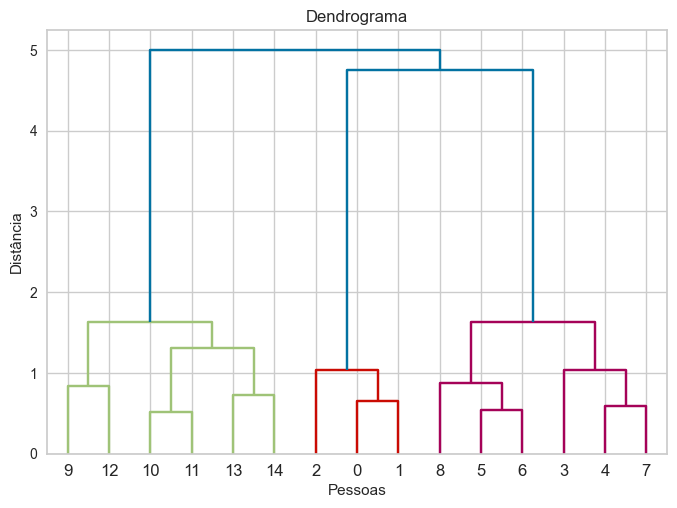

In [476]:
dendrograma = dendrogram(linkage(base_salario, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância');

In [477]:
from sklearn.cluster import AgglomerativeClustering

In [478]:
hc_salario = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
rotulos = hc_salario.fit_predict(base_salario)

c:\Users\thiag\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [479]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [480]:
grafico = px.scatter(x = base_salario[:,0], y = base_salario[:,1], color = rotulos)
grafico.show()